In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers

In [1]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

#Library for saving data
import pickle

#other libraries
import pandas as pd
import numpy as np

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data file.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,unamed,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [3]:
df.columns

Index(['unamed', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
len(df.columns)

37

# Data Description

Observations:

1.The dataset has 37 columns

2.There are both numerical and categorical columns. There is also a date column.

3.label means Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

4.Modelling will be done through binary classification


# Statistical data analysis

In [5]:
df.describe(include='all')

,unamed,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,04-07-2016
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


1. Total number of data is 209593

2.pcircle has only 1 unique value which will need to be dropped

3.Outliers are present in all the columns

labels count: 
  1    183431
0     26162
Name: label, dtype: int64


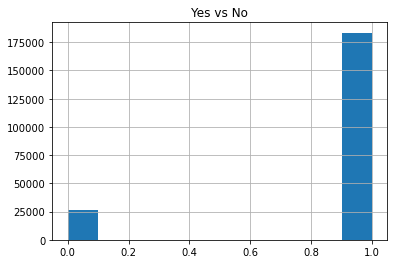

In [6]:
# checking for class imbalance
print("labels count: \n ",df["label"].value_counts())

df["label"].hist(grid=True)
plt.title("Yes vs No")
plt.show()

There is class imbalance present where 0 is failure and 1 is sucess. The Success is higher is number, hence smote/upsampling/undersampling needs to be done

# Feature Engineering

In [7]:
# renaming
df.rename(columns = {'msisdn':'mobile number of user'}, inplace = True)
df.rename(columns = {'aon':'age on cellular network in days'}, inplace = True)

df.rename(columns = {'daily_decr30':'Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)'}, inplace = True)
df.rename(columns = {'daily_decr90':'Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)'}, inplace = True)
df.rename(columns = {'rental30':'Mean main account balance over last 30 days'}, inplace = True)
df.rename(columns = {'rental90':'Mean main account balance over last 90 days'}, inplace = True)

df.rename(columns = {'last_rech_date_ma':'Number of days till last recharge of main account'}, inplace = True)
df.rename(columns = {'last_rech_date_da':'Number of days till last recharge of data account'}, inplace = True)
df.rename(columns = {'last_rech_amt_ma':'Total Amount of last recharge of main account (in Indonesian Rupiah)'}, inplace = True)

df.rename(columns = {'cnt_ma_rech30':'Number of times main account got recharged in last 30 days'}, inplace = True)
df.rename(columns = {'fr_ma_rech30':'Frequency of main account recharged in last 30 days'}, inplace = True)

df.rename(columns = {'sumamnt_ma_rech30':'Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)'}, inplace = True)
df.rename(columns = {'medianmarechprebal30':'Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)'}, inplace = True)

df.rename(columns = {'medianamnt_ma_rech30':'Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)'}, inplace = True)
df.rename(columns = {'medianmarechprebal30':'Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)'}, inplace = True)
df.rename(columns = {'cnt_ma_rech90':'Number of times main account got recharged in last 90 days'}, inplace = True)
df.rename(columns = {'fr_ma_rech90':'Frequency of main account recharged in last 90 days'}, inplace = True)

df.rename(columns = {'sumamnt_ma_rech90':'Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)'}, inplace = True)
df.rename(columns = {'medianamnt_ma_rech90':'Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)'}, inplace = True)
df.rename(columns = {'medianmarechprebal90':'Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)'}, inplace = True)

df.rename(columns = {'cnt_da_rech30':'Number of times data account got recharged in last 30 days'}, inplace = True)
df.rename(columns = {'fr_da_rech30':'Frequency of data account recharged in last 30 days'}, inplace = True)
df.rename(columns = {'fr_da_rech90':'Frequency of data account recharged in last 90 days'}, inplace = True)

df.rename(columns = {'cnt_da_rech90':'Number of times data account got recharged in last 90 days'}, inplace = True)
df.rename(columns = {'cnt_loans30':'Number of loans taken by user in last 30 days'}, inplace = True)
df.rename(columns = {'amnt_loans30':'Total amount of loans taken by user in last 30 days'}, inplace = True)
df.rename(columns = {'maxamnt_loans30':'maximum amount of loan taken by the user in last 30 days'}, inplace = True)

df.rename(columns = {'medianamnt_loans30':'Median of amounts of loan taken by the user in last 30 days'}, inplace = True)
df.rename(columns = {'cnt_loans90':'Number of loans taken by user in last 90 days'}, inplace = True)
df.rename(columns = {'amnt_loans90':'Total amount of loans taken by user in last 90 days'}, inplace = True)

df.rename(columns = {'maxamnt_loans90':'maximum amount of loan taken by the user in last 90 days'}, inplace = True)
df.rename(columns = {'medianamnt_loans90':'Median of amounts of loan taken by the user in last 90 days'}, inplace = True)

df.rename(columns = {'payback30':'Mean payback time in days over last 30 days'}, inplace = True)
df.rename(columns = {'payback90':'Mean payback time in days over last 90 days'}, inplace = True)
df.rename(columns = {'pcircle':'telecom circle'}, inplace = True)
df.rename(columns = {'pdate':'date'}, inplace = True)

In [8]:
df

,unamed,label,mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Mean main account balance over last 30 days,Mean main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Total Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,Frequency of main account recharged in last 30 days,Total amount of recharge in main account over last 30 days (in Indonesian Rupiah),Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah),Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah),Number of times main account got recharged in last 90 days,Frequency of main account recharged in last 90 days,Total amount of recharge in main account over last 90 days (in Indonasian Rupiah),Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah),Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah),Number of times data account got recharged in last 30 days,Frequency of data account recharged in last 30 days,Number of times data account got recharged in last 90 days,Frequency of data account recharged in last 90 days,Number of loans taken by user in last 30 days,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Mean payback time in days over last 30 days,Mean payback time in days over last 90 days,telecom circle,date
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,1

In [9]:
df.describe(include='all')

,unamed,label,mobile number of user,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Mean main account balance over last 30 days,Mean main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Total Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,Frequency of main account recharged in last 30 days,Total amount of recharge in main account over last 30 days (in Indonesian Rupiah),Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah),Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah),Number of times main account got recharged in last 90 days,Frequency of main account recharged in last 90 days,Total amount of recharge in main account over last 90 days (in Indonasian Rupiah),Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah),Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah),Number of times data account got recharged in last 30 days,Frequency of data account recharged in last 30 days,Number of times data account got recharged in last 90 days,Frequency of data account recharged in last 90 days,Number of loans taken by user in last 30 days,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Mean payback time in days over last 30 days,Mean payback time in days over last 90 days,telecom circle,date
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,04-07-2016
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.00

In [10]:
#dropping unamed
df.drop(["unamed"],axis=1,inplace=True)

In [11]:
#dropping telecom circle since its unique
df.drop(['telecom circle'],axis=1,inplace=True)

In [12]:
#Breaking down the date

#extracting Date into more usable format
df["day"] = pd.to_datetime(df["date"], format="%d-%m-%Y").dt.day
df["month"] = pd.to_datetime(df["date"], format = "%d-%m-%Y").dt.month
df["year"] = pd.to_datetime(df["date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use
df.drop(["date"], axis = 1, inplace = True)

In [13]:
#Mobile number is unique for everyone, hence dropping it
df.drop(["mobile number of user"], axis = 1, inplace = True)

In [14]:
main_account=df[{"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)","Mean main account balance over last 30 days","Mean main account balance over last 90 days","Number of days till last recharge of main account","Total Amount of last recharge of main account (in Indonesian Rupiah)","Number of times main account got recharged in last 30 days","Frequency of main account recharged in last 30 days","Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)","Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)","Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)","Number of times main account got recharged in last 90 days","Frequency of main account recharged in last 90 days","Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)","Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)","Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)"}]
main_account

,Total amount of recharge in main account over last 30 days (in Indonesian Rupiah),Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah),Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah),Frequency of main account recharged in last 30 days,Mean main account balance over last 90 days,Total amount of recharge in main account over last 90 days (in Indonasian Rupiah),Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah),Number of times main account got recharged in last 30 days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)",Mean main account balance over last 30 days,Number of times main account got recharged in last 90 days,Frequency of main account recharged in last 90 days,Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah),"Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Total Amount of last recharge of main account (in Indonesian Rupiah),Number of days till last recharge of main account
0,3078.0,1539.0,7.50,21.0,260.13,3078,1539.0,2,3055.050000,220.13,2,21,7.50,3065.150000,1539,2.0
1,5787.0,5787.0,61.04,0.0,3691.26,5787,5787.0,1,12122.000000,3691.26,1,0,61.04,12124.750000,5787,20.0
2,1539.0,1539.0,66.32,0.0,900.13,1539,1539.0,1,1398.000000,900.13,1,0,66.32,1398.000000,1539,3.0
3,0.0,0.0,2.50,0.0,159.42,947,947.0,0,21.228000,159.42,1,0,0.00,21.228000,947,41.0
4,20029.0,2309.0,35.00,2.0,1098.90,23496,2888.0,7,150.619333,1098.90,8,2,29.00,150.619333,2309,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,10404.0,3178.0,91.81,2.0,1089.19,10404,3178.0,3,151.872333,1089.19,3,2,91.81,151.872333,4048,1.0
209589,3092.0,773.0,111.80,1.0,1728.36,4038,773.0,4,36.936000,1728.36,6,2,161.30,36.936000,773,4.0
209590,9334.0,1539.0,47.13,8.0,8893.20,18592,1539.0,5,11843.111670,5861.83,11,5,51.13,11904.350000,1539,3.0
209591,12154.0,773.0,100.00,4.0,984.58,17941,2410.5,5,12488.228330,411.83,6,4,164.00,12574.370000,773,2.0


In [15]:
#dropping year as its unique
df.drop(["year"], axis = 1, inplace = True)

Text(0.5, 1.0, 'label')

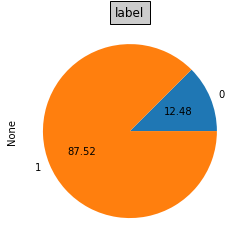

In [16]:
df.groupby('label').size().plot(kind='pie', autopct='%.2f')
plt.title("label",bbox={'facecolor':'0.8', 'pad':5})


The Class is imbalanced, the Yes is 1 and 0 is no

In [17]:
# class count
class_count_0, class_count_1 = df['label'].value_counts()

In [18]:
#Separate class
class_0 = df[df['label'] == 1]
class_1 = df[df['label'] == 0]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (183431, 35)
class 1: (26162, 35)


total class of 1 and0:
 1    26162
0    26162
Name: label, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

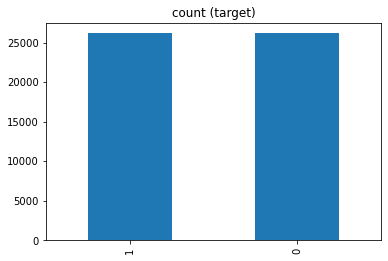

In [19]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:\n",test_under['label'].value_counts())# plot the count after under-sampeling
test_under['label'].value_counts().plot(kind='bar', title='count (target)')

In [20]:
df=test_under
df

,label,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Mean main account balance over last 30 days,Mean main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Total Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,Frequency of main account recharged in last 30 days,Total amount of recharge in main account over last 30 days (in Indonesian Rupiah),Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah),Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah),Number of times main account got recharged in last 90 days,Frequency of main account recharged in last 90 days,Total amount of recharge in main account over last 90 days (in Indonasian Rupiah),Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah),Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah),Number of times data account got recharged in last 30 days,Frequency of data account recharged in last 30 days,Number of times data account got recharged in last 90 days,Frequency of data account recharged in last 90 days,Number of loans taken by user in last 30 days,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Mean payback time in days over last 30 days,Mean payback time in days over last 90 days,day,month
130971,1,276.0,3373.615000,3412.150000,-233.65,-365.67,2.0,0.0,1539,3,14.0,11078.0,1539.0,23.00,5,32,13572,1539.0,23.00,0.0,0.0,0,0,1,6,6.00000,0.0,1.0,6,6,0.0,0.000000,0.000000,7,7
106725,1,976.0,12307.500000,15924.410000,15091.18,21922.85,1.0,0.0,770,9,3.0,8474.0,770.0,58.40,20,3,25059,860.0,41.40,0.0,0.0,0,0,4,24,6.00000,0.0,14.0,84,6,0.0,3.500000,3.333333,6,8
27749,1,1169.0,167.073333,167.073333,1210.60,1210.60,2.0,0.0,1539,5,8.0,27078.0,8000.0,150.63,5,8,27078,8000.0,150.63,0.0,0.0,0,0,3,18,6.00000,0.0,3.0,18,6,0.0,2.000000,2.000000,20,6
187064,1,363.0,1809.211000,1815.790000,3712.09,3978.55,2.0,0.0,773,9,0.0,7717.0,773.0,16.00,10,0,8490,773.0,19.00,0.0,0.0,0,0,8,48,72300.34968,0.0,8.0,48,6,0.0,3.428571,4.125000,3,7
36039,1,398.0,1050.000000,1050.000000,200.13,200.13,1.0,0.0,1539,1,0.0,1539.0,1539.0,520.00,1,0,1539,1539.0,520.00,0.0,0.0,0,0,1,6,6.00000,0.0,1.0,6,6,0.0,0.000000,0.000000,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0,153.0,5670.733333,5672.200000,1817.08,2764.88,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.00000,0.0,1.0,6,6,0.0,0.000000,0.000000,20,7
209549,0,843.0,729.235000,758.470000,7470.90,9537.90,1.0,0.0,770,1,0.0,770.0,770.0,19.82,2,40,6557,3278.5,49.82,0.0,0.0,0,0,1,6,6.00000,0.0,2.0,12,6,0.0,0.000000,25.500000,15,7
209554,0,744.0,1454.491667,1461.750000,559.73,655.28,31.0,0.0,2309,0,0.0,0.0,0.0,0.00,1,0,2309,2309.0,20.00,0.0,0.0,0,0,1,6,6.00000,0.0,1.0,6,6,0.0,0.000000,0.000000,13,7
209571,0,827.0,1867.668667,1881.180000,1875.72,2312.65,14.0,0.0,1924,2,3.0,3848.0,1924.0,6.20,2,3,3848,1924.0,6.20,0.0,0.0,0,0,1,6,6.00000,0.0,1.0,6,6,0.0,0.000000,0.000000,13,7


# EDA

In [21]:
print("length of df",len(df))

length of df 52324


In [22]:
df.describe()

,label,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Mean main account balance over last 30 days,Mean main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Total Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,Frequency of main account recharged in last 30 days,Total amount of recharge in main account over last 30 days (in Indonesian Rupiah),Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah),Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah),Number of times main account got recharged in last 90 days,Frequency of main account recharged in last 90 days,Total amount of recharge in main account over last 90 days (in Indonasian Rupiah),Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah),Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah),Number of times data account got recharged in last 30 days,Frequency of data account recharged in last 30 days,Number of times data account got recharged in last 90 days,Frequency of data account recharged in last 90 days,Number of loans taken by user in last 30 days,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Mean payback time in days over last 30 days,Mean payback time in days over last 90 days,day,month
count,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000,52324.000000
mean,0.500000,8358.290483,3662.275284,4063.931955,2423.251756,3002.713377,3763.598568,3349.965364,1720.684141,2.846648,3525.535113,5422.953960,1484.834779,4250.190437,4.406907,6.459158,8560.983354,1585.891302,73.598836,259.765284,3678.647815,0.040459,0.050799,2.202928,14.145593,276.494577,0.043202,18.396341,17.726053,6.513149,0.038204,2.931026,3.776609,14.361956,6.667151
std,0.500005,76915.175368,7593.929721,8879.056429,4064.850553,5197.962627,53405.923370,50755.348845,2334.901008,3.722057,51687.341029,9298.459786,2059.262699,57178.608901,6.162475,12.253704,14890.362454,2129.159961,400.764319,4167.788977,53552.875604,0.425685,0.960339,2.166181,14.659110,4256.868109,0.194338,232.896506,21.872033,1.782949,0.181684,9.351992,10.908542,8.149059,0.666959
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
25%,0.000000,210.000000,12.435500,12.764250,172.260000,185.235000,1.000000,0.000000,770.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,773.000000,770.000000,0.830000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,8.000000,6.000000
50%,0.500000,474.000000,518.400000,524.656333,893.100000,1037.410000

In [23]:
x=df.drop(["label"],axis=1)
y=df["label"]



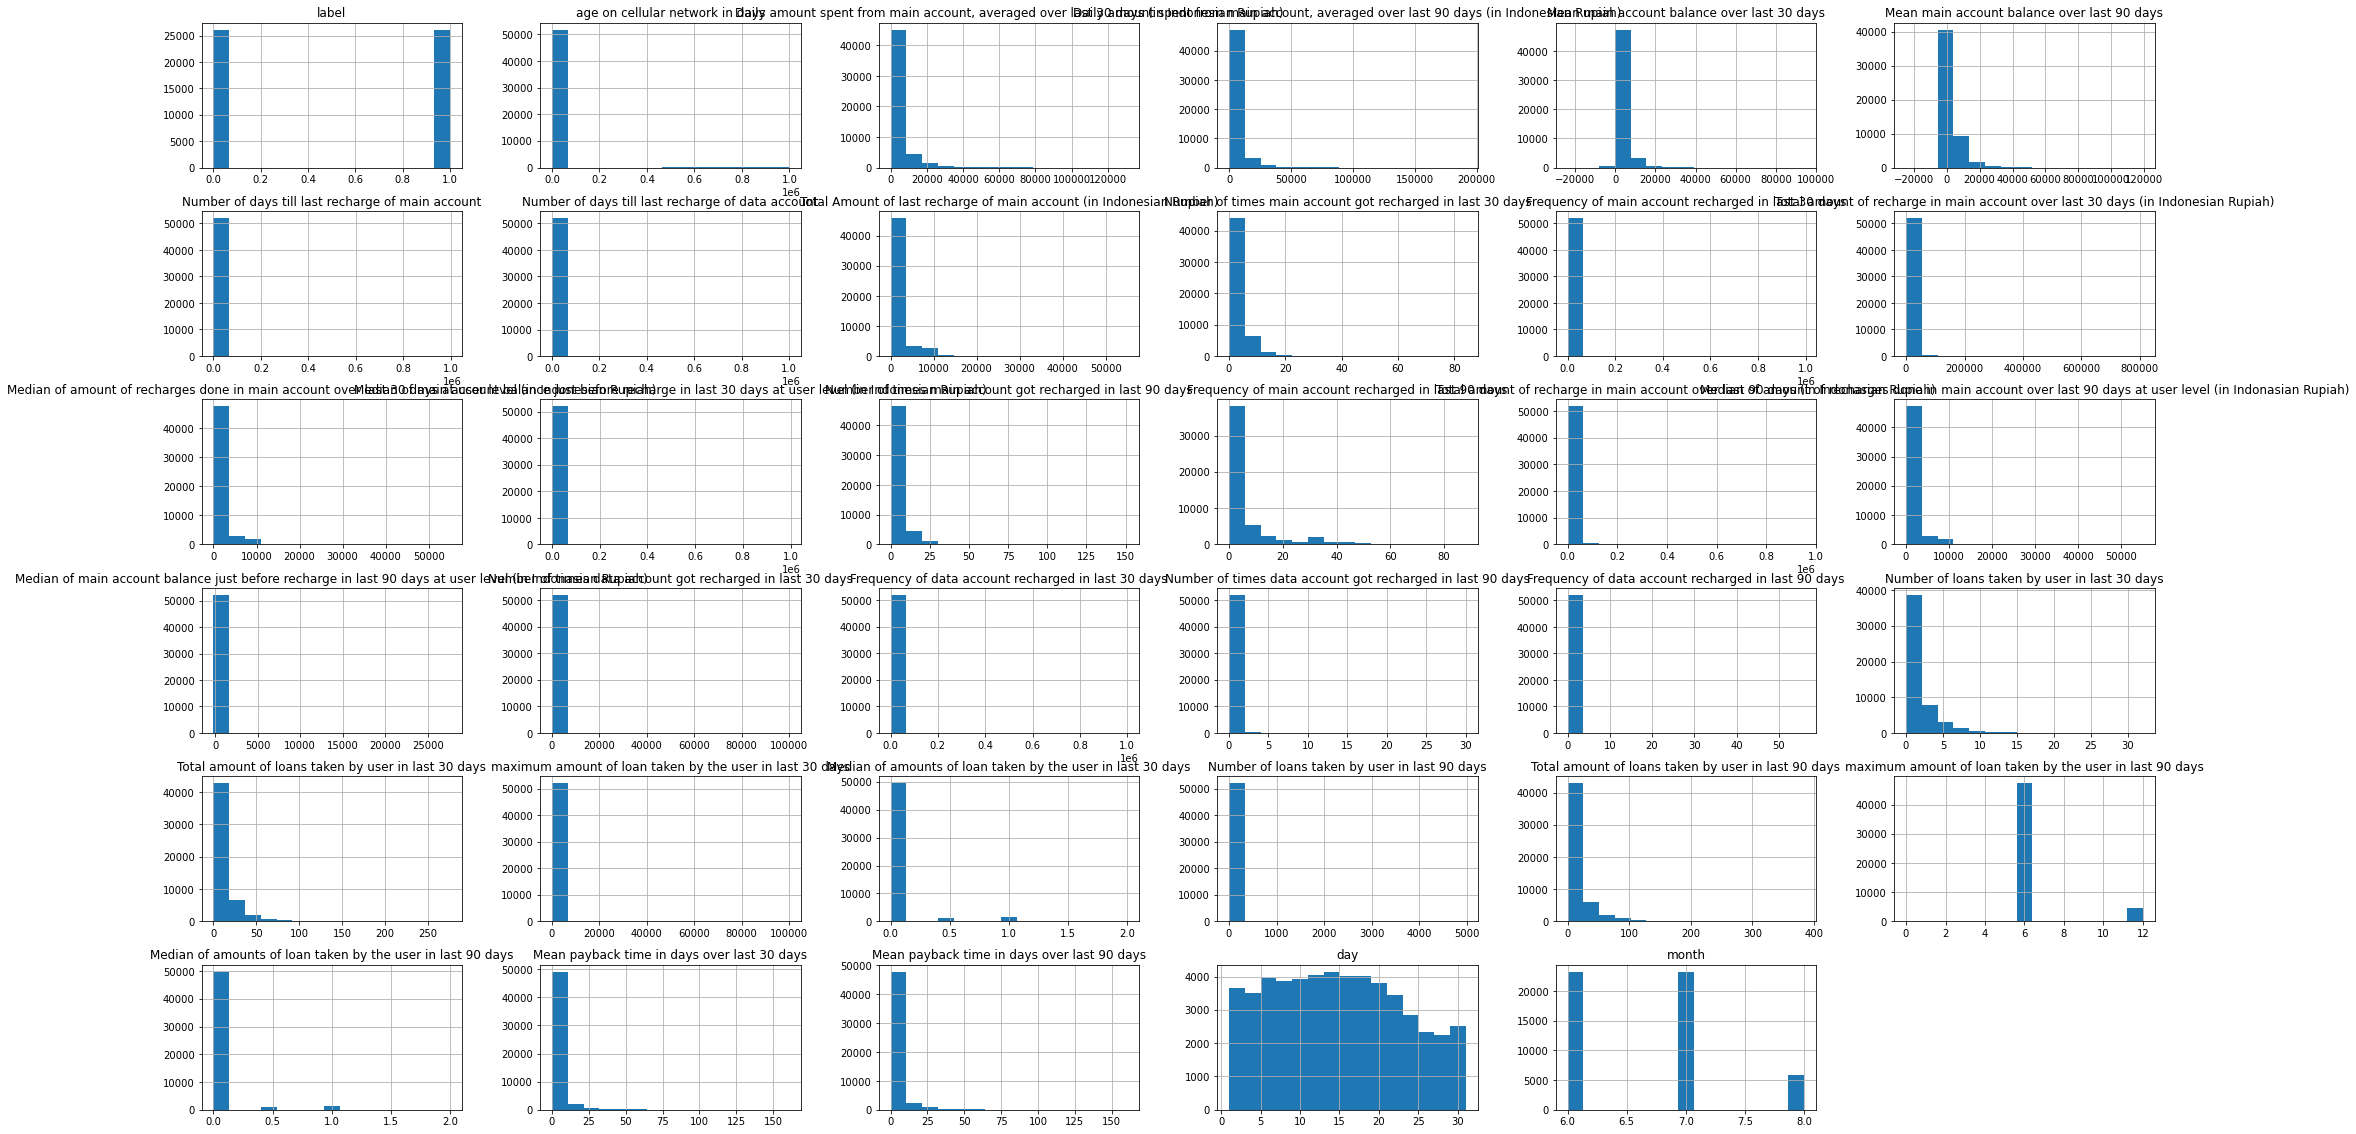

In [24]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


In [25]:
#finding the columns having outliers
num=df.drop(["day","label","Mean main account balance over last 30 days"],axis=1)

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<5).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  52324
columns after applying zscore:  46165


In [26]:
df=df_new

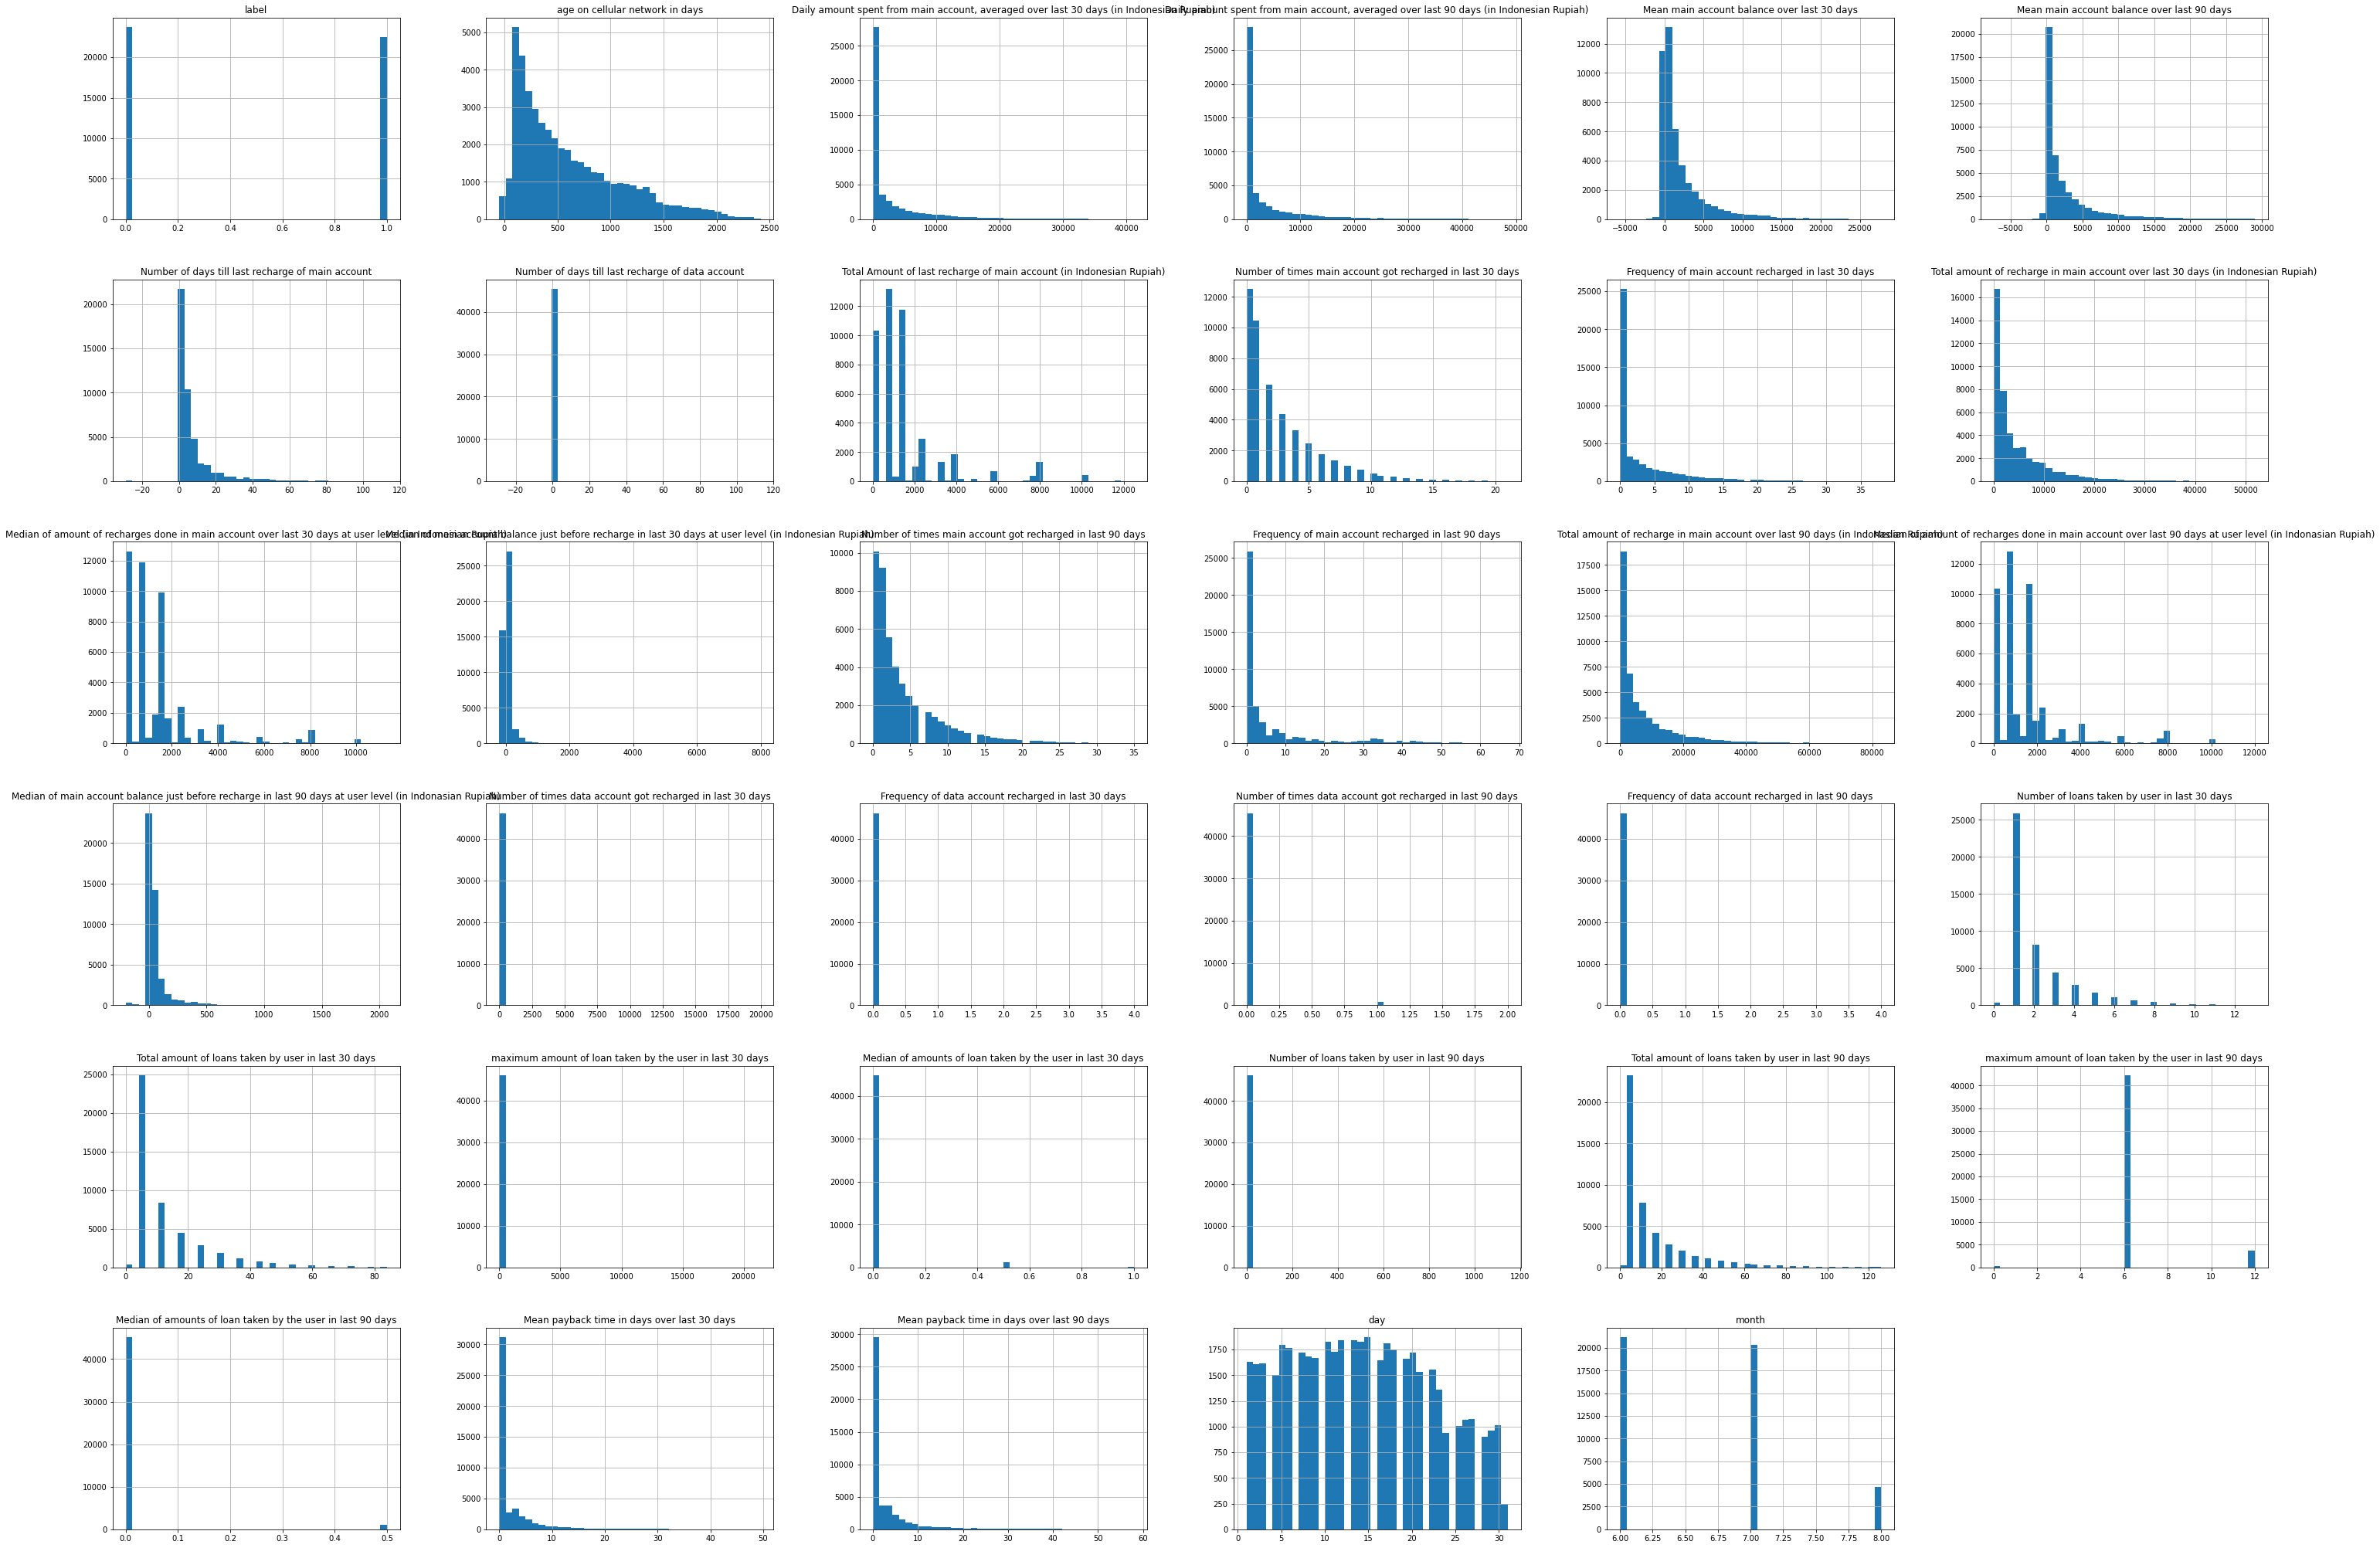

In [27]:
#checking for outliers
df_new.hist(figsize=(50,36),bins = 40)
plt.title("Features Distribution")
plt.show()


outliers are removed where we are keeping 92% of the data

In [28]:
print("length of df",len(df))

length of df 46165


In [29]:
df

,label,age on cellular network in days,"Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)","Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",Mean main account balance over last 30 days,Mean main account balance over last 90 days,Number of days till last recharge of main account,Number of days till last recharge of data account,Total Amount of last recharge of main account (in Indonesian Rupiah),Number of times main account got recharged in last 30 days,Frequency of main account recharged in last 30 days,Total amount of recharge in main account over last 30 days (in Indonesian Rupiah),Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah),Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah),Number of times main account got recharged in last 90 days,Frequency of main account recharged in last 90 days,Total amount of recharge in main account over last 90 days (in Indonasian Rupiah),Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah),Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah),Number of times data account got recharged in last 30 days,Frequency of data account recharged in last 30 days,Number of times data account got recharged in last 90 days,Frequency of data account recharged in last 90 days,Number of loans taken by user in last 30 days,Total amount of loans taken by user in last 30 days,maximum amount of loan taken by the user in last 30 days,Median of amounts of loan taken by the user in last 30 days,Number of loans taken by user in last 90 days,Total amount of loans taken by user in last 90 days,maximum amount of loan taken by the user in last 90 days,Median of amounts of loan taken by the user in last 90 days,Mean payback time in days over last 30 days,Mean payback time in days over last 90 days,day,month
130971,1,276.0,3373.615000,3412.150000,-233.65,-365.67,2.0,0.0,1539,3,14.0,11078.0,1539.0,23.00,5,32,13572,1539.0,23.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,7,7
106725,1,976.0,12307.500000,15924.410000,15091.18,21922.85,1.0,0.0,770,9,3.0,8474.0,770.0,58.40,20,3,25059,860.0,41.40,0.0,0.0,0,0,4,24,6.0,0.0,14.0,84,6,0.0,3.5,3.333333,6,8
27749,1,1169.0,167.073333,167.073333,1210.60,1210.60,2.0,0.0,1539,5,8.0,27078.0,8000.0,150.63,5,8,27078,8000.0,150.63,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,2.0,2.000000,20,6
36039,1,398.0,1050.000000,1050.000000,200.13,200.13,1.0,0.0,1539,1,0.0,1539.0,1539.0,520.00,1,0,1539,1539.0,520.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,20,8
31787,1,481.0,148.884667,148.884667,55.64,55.64,8.0,0.0,4048,1,0.0,4048.0,4048.0,17.40,1,0,4048,4048.0,17.40,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,26,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0,153.0,5670.733333,5672.200000,1817.08,2764.88,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,20,7
209549,0,843.0,729.235000,758.470000,7470.90,9537.90,1.0,0.0,770,1,0.0,770.0,770.0,19.82,2,40,6557,3278.5,49.82,0.0,0.0,0,0,1,6,6.0,0.0,2.0,12,6,0.0,0.0,25.500000,15,7
209554,0,744.0,1454.491667,1461.750000,559.73,655.28,31.0,0.0,2309,0,0.0,0.0,0.0,0.00,1,0,2309,2309.0,20.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,13,7
209571,0,827.0,1867.668667,1881.180000,1875.72,2312.65,14.0,0.0,1924,2,3.0,3848.0,1924.0,6.20,2,3,3848,1924.0,6.20,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.000000,13,7


# Graphical data analysis

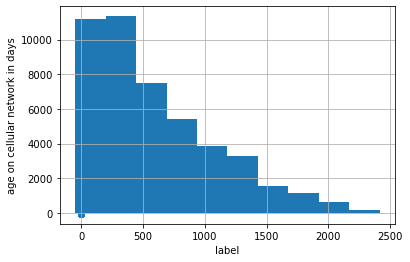

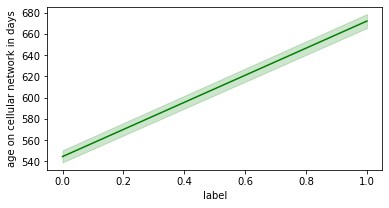

<AxesSubplot:xlabel='label', ylabel='age on cellular network in days'>

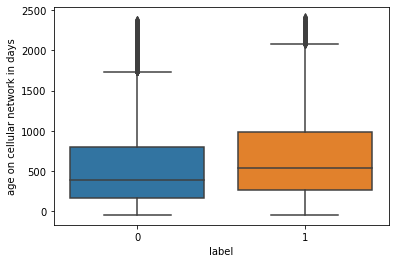

In [30]:
# age on cellular network in days

x=df['label']
y=df['age on cellular network in days']

y.hist()

#scatter plot
plt.scatter(x,y)
plt.xlabel('label')
plt.ylabel('age on cellular network in days')
plt.show()

plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="age on cellular network in days",data=df, color='green')
plt.show()

#boxplot
sns.boxplot(x,y,data=df)

# Main Account

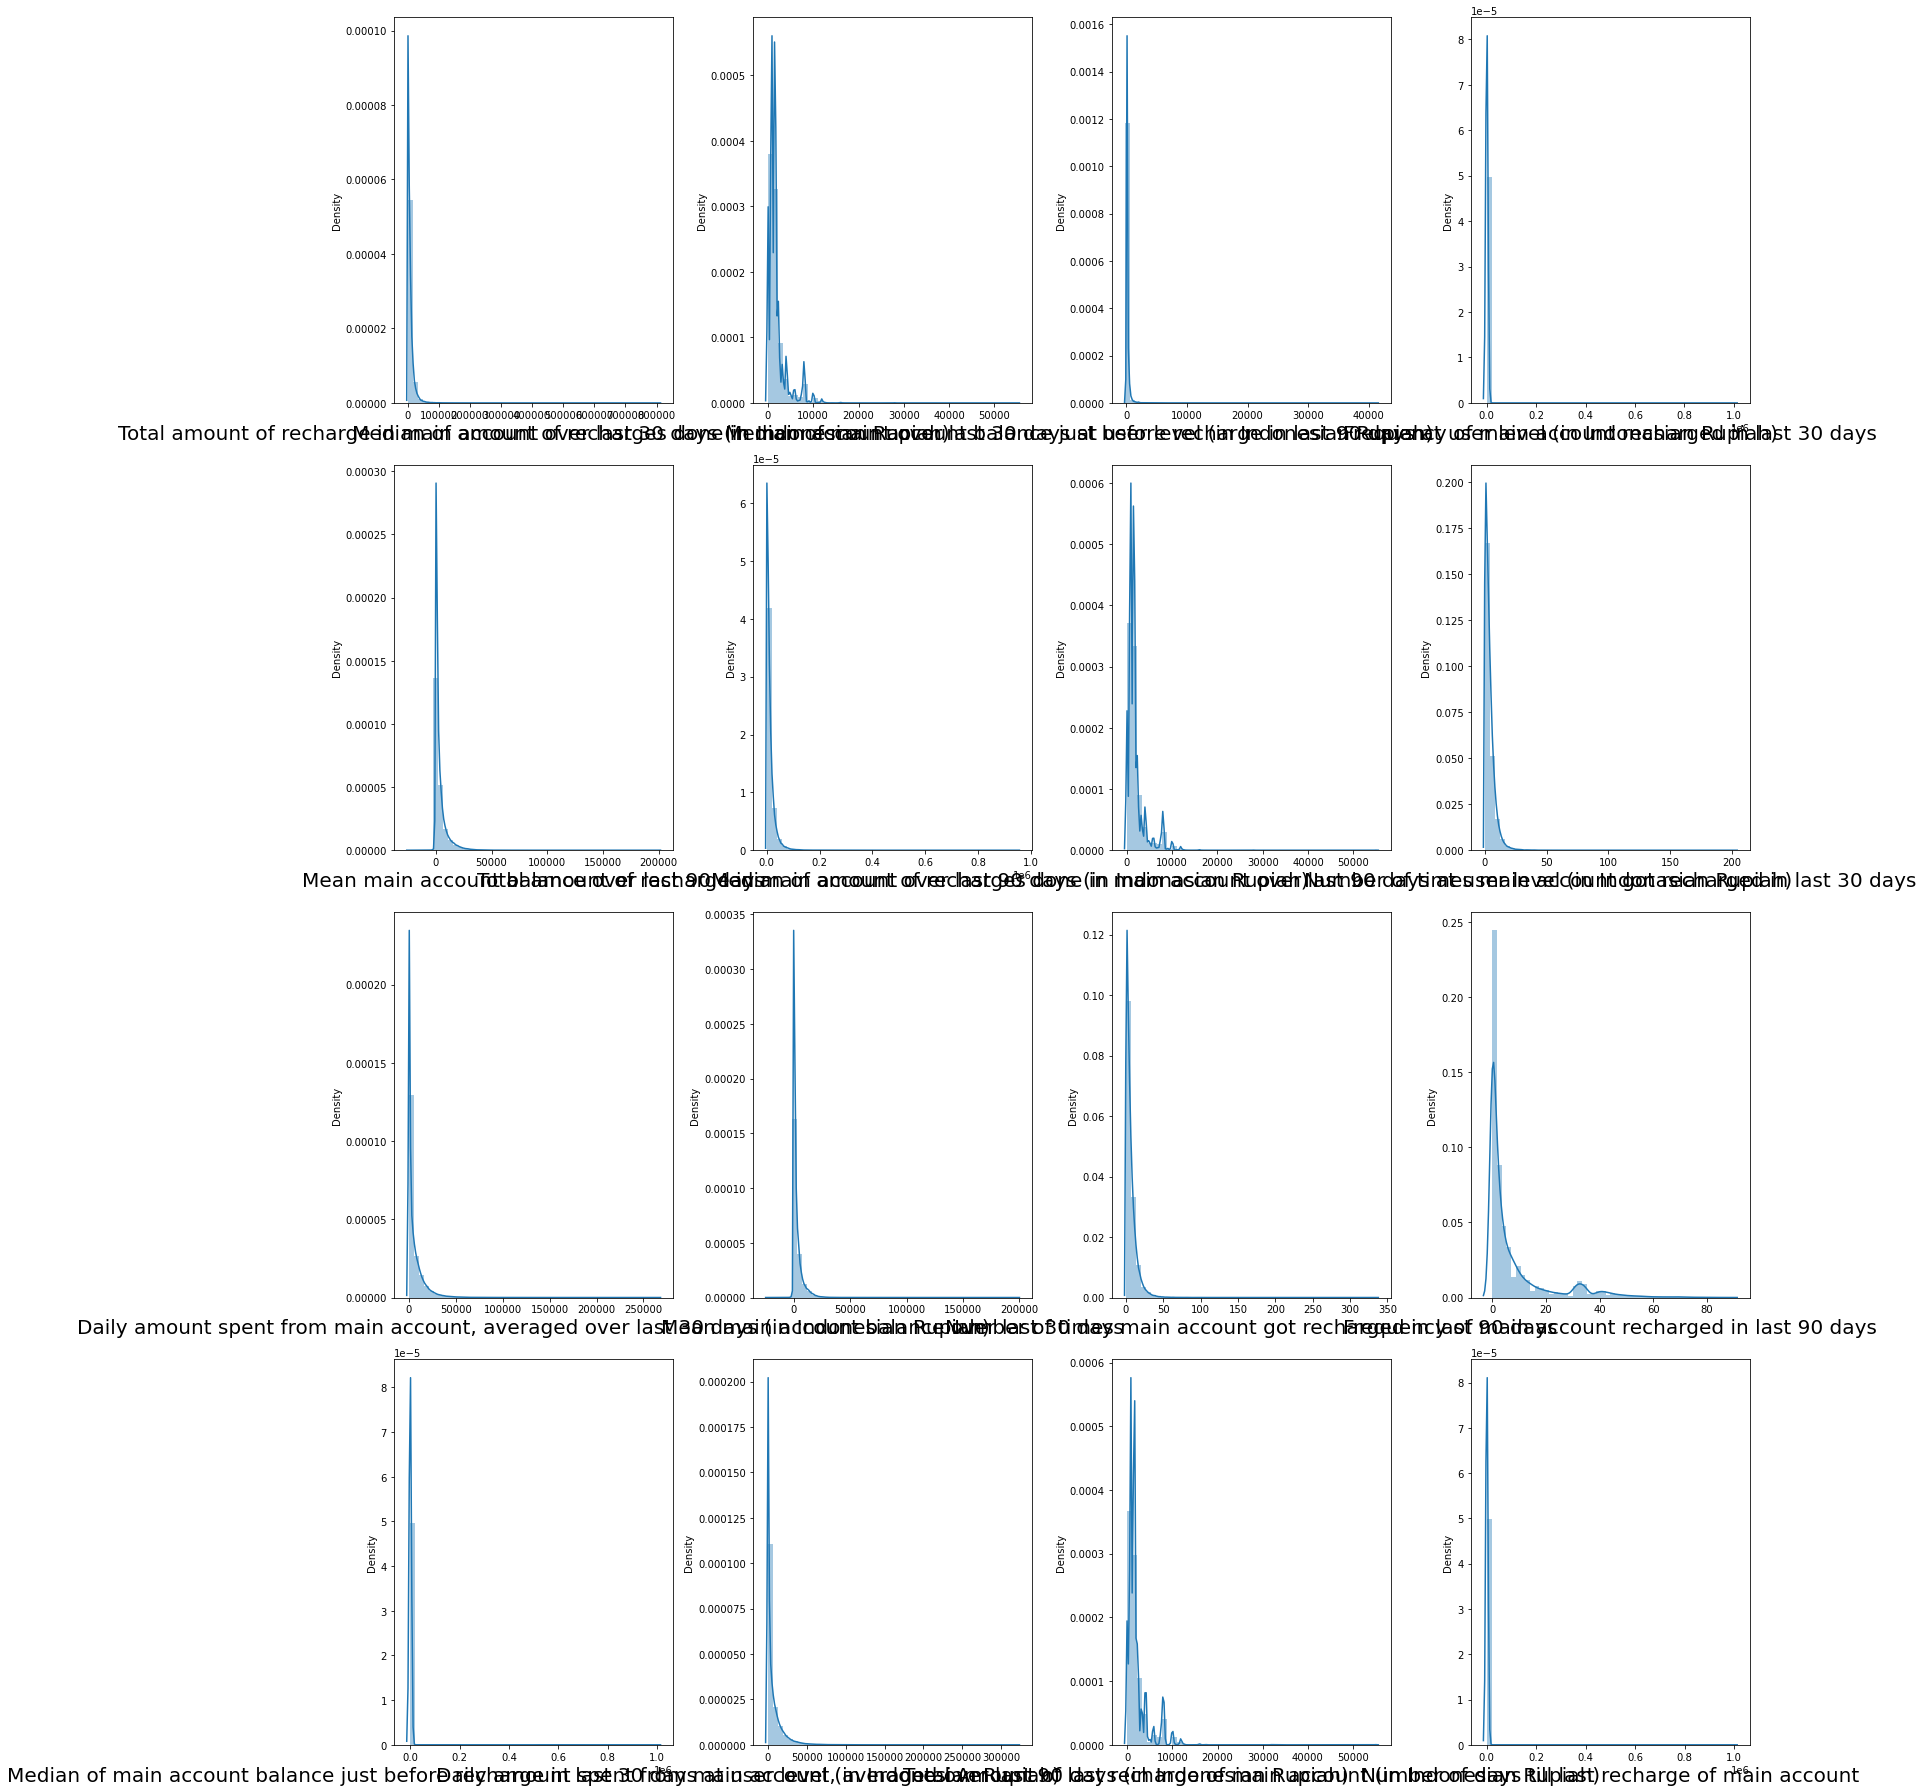

In [31]:
#understanding relationship between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in main_account:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(main_account[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

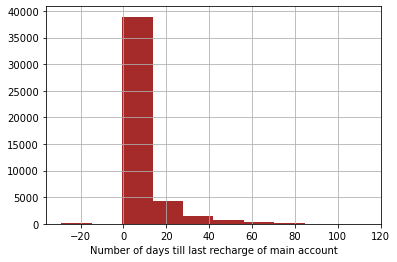

In [32]:
#histogram
df["Number of days till last recharge of main account"].hist(color='brown')
plt.xlabel('Number of days till last recharge of main account')
plt.show()


# 1.Last 30days recharge in main account

1. Number of times of recharge

2.Main account balance before recharge

3.Amount recharged



# a. Number of times recharge done in last 30 

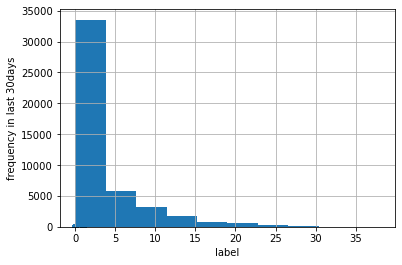

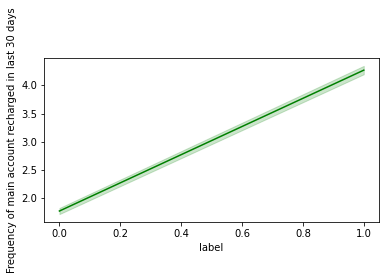

<AxesSubplot:xlabel='label', ylabel='Frequency of main account recharged in last 30 days'>

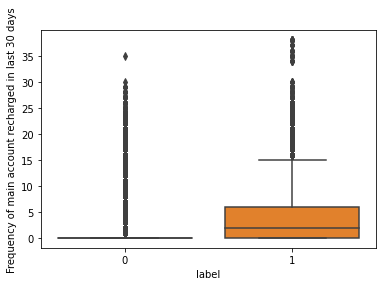

In [33]:
#Frequency of main account recharged in last 30 days
x=df['label']
y=df['Frequency of main account recharged in last 30 days']

y.hist()

#scatter plot
plt.scatter(x,y)
plt.xlabel('label')
plt.ylabel('frequency in last 30days')
plt.show()

plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Frequency of main account recharged in last 30 days",data=df, color='green')
plt.show()

#boxplot
sns.boxplot(x,y,data=df)


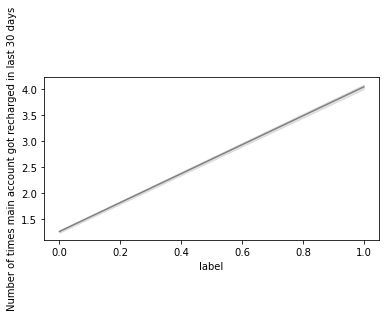

<AxesSubplot:>

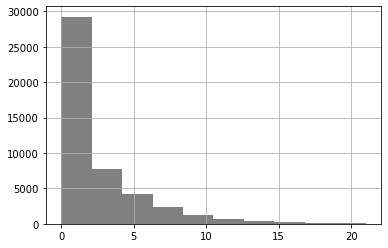

In [34]:

#lineplot
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Number of times main account got recharged in last 30 days",data=df, color='grey')
plt.show()

#histogram
df["Number of times main account got recharged in last 30 days"].hist(color='grey')

1.Maximum times recharge was done was between 1 and 4

2.Default is less if the number of recharge is above 30
i.e a person with more recharging potential will not default much


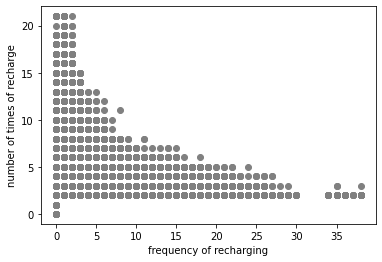

In [35]:
#Frequency of main in last 30
x=df['Frequency of main account recharged in last 30 days']
y=df['Number of times main account got recharged in last 30 days']

#scatter plot
plt.scatter(x,y,color='grey')
plt.xlabel('frequency of recharging')
plt.ylabel('number of times of recharge')
plt.show()


# c. Total amount recharged

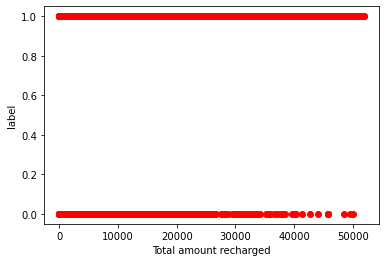

Text(0.5, 0, 'Total amount recharged')

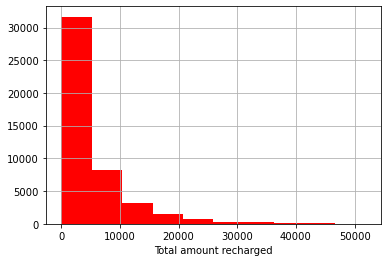

In [36]:
# between total and median

x=df['Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)']
y=df['label']

#scatter plot
plt.scatter(x,y,color='red')
plt.xlabel('Total amount recharged')
plt.ylabel('label')
plt.show()

x.hist(color='red')
plt.xlabel('Total amount recharged')


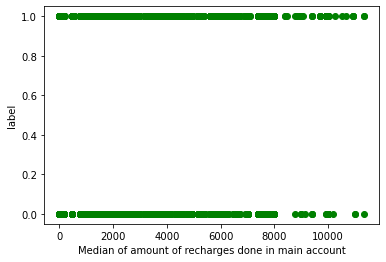

Text(0.5, 0, 'Median of amount of recharges done in main account')

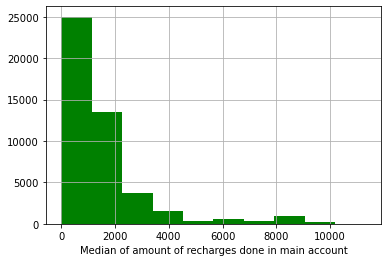

In [37]:
x=df['Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)']
y=df['label']

#scatter plot
plt.scatter(x,y,color='green')
plt.xlabel('Median of amount of recharges done in main account')
plt.ylabel('label')
plt.show()

x.hist(color='green')
plt.xlabel('Median of amount of recharges done in main account')

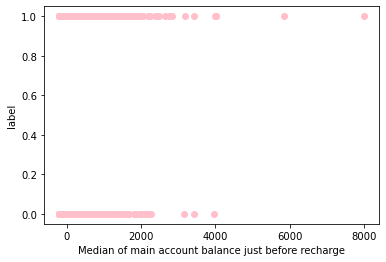

Text(0.5, 0, 'Median of main account balance just before recharge')

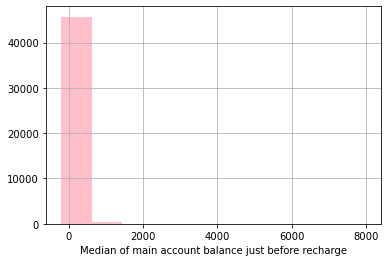

In [38]:
x=df['Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)']
y=df['label']

#scatter plot
plt.scatter(x,y,color='pink')
plt.xlabel('Median of main account balance just before recharge')
plt.ylabel('label')
plt.show()

x.hist(color='pink')
plt.xlabel('Median of main account balance just before recharge')

# d.Mean of main account balance over last 30 days

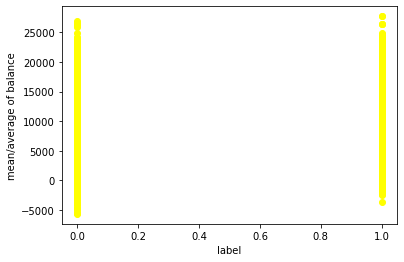

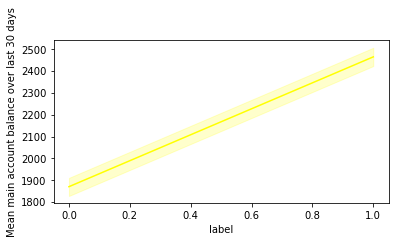

Text(0.5, 0, 'mean/average of balance')

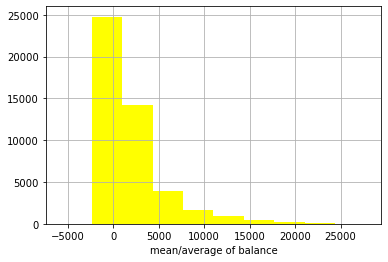

In [39]:
# Mean of main account balance over last 30 days

#Frequency of main in last 30
x=df['label']
y=df['Mean main account balance over last 30 days']

#scatter plot
plt.scatter(x,y,color='yellow')
plt.xlabel('label')
plt.ylabel('mean/average of balance')
plt.show()

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Mean main account balance over last 30 days",data=df, color='yellow')
plt.show()

#histogram
y.hist(color='yellow')
plt.xlabel('mean/average of balance')

# Amount spent in talking each day

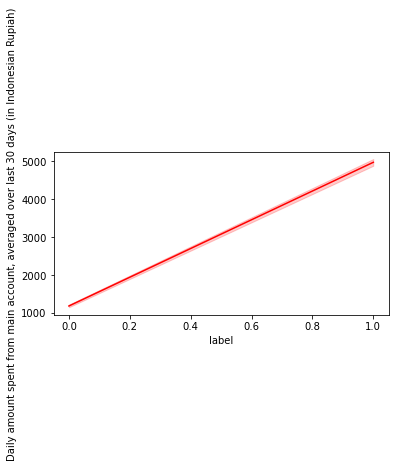

<AxesSubplot:>

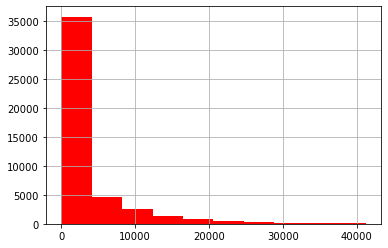

In [40]:
#Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)",data=df, color='red')
plt.show()

#histogram
df["Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)"].hist(color='red')


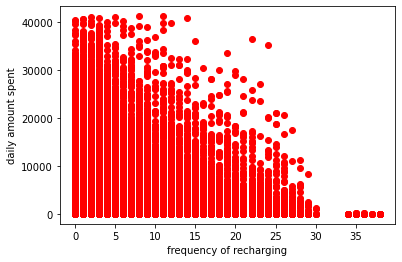

In [41]:
#Frequency of main in last 30
x=df['Frequency of main account recharged in last 30 days']
y=df['Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)']

#scatter plot
plt.scatter(x,y,color='red')
plt.xlabel('frequency of recharging')
plt.ylabel('daily amount spent')
plt.show()

# Total amount of recharge done

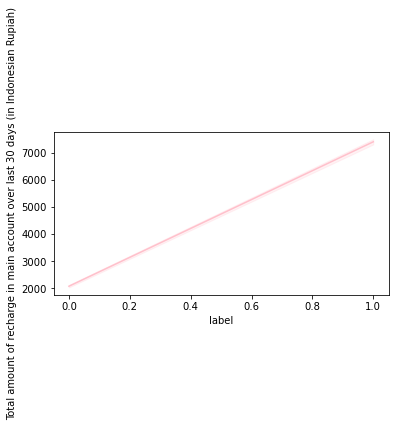

<AxesSubplot:>

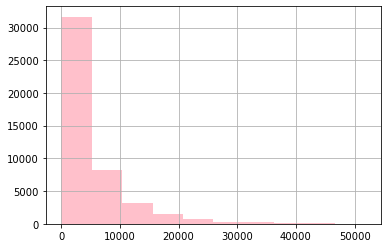

In [42]:
#lineplot
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)",data=df, color='pink')
plt.show()

#histogram
df["Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)"].hist(color='pink')

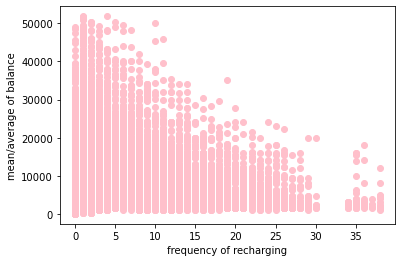

In [43]:
#Frequency of main in last 30
x=df['Frequency of main account recharged in last 30 days']
y=df['Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)']

#scatter plot
plt.scatter(x,y,color='pink')
plt.xlabel('frequency of recharging')
plt.ylabel('mean/average of balance')
plt.show()


# Median of amount of recharge done

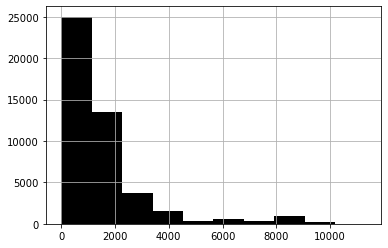

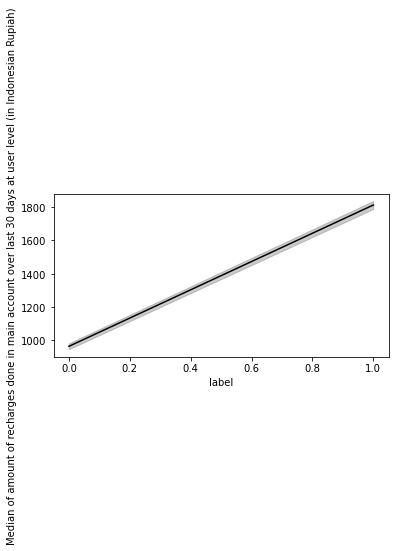

In [44]:
#histogram
df["Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)"].hist(color='black')

#lineplot
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)",data=df, color='black')
plt.show()



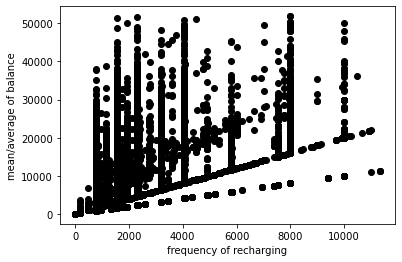

In [45]:

x=df['Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)']
y=df['Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)']

#scatter plot
plt.scatter(x,y,color='black')
plt.xlabel('frequency of recharging')
plt.ylabel('mean/average of balance')
plt.show()

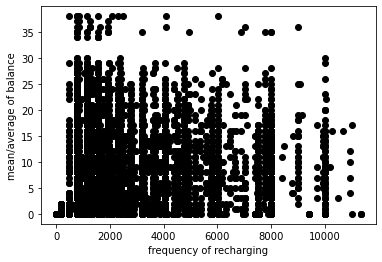

In [46]:
#Frequency of main in last 30
x=df['Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)']
y=df['Frequency of main account recharged in last 30 days']

#scatter plot
plt.scatter(x,y,color='black')
plt.xlabel('frequency of recharging')
plt.ylabel('mean/average of balance')
plt.show()

# 2. Last 30 days loan

# a.Number of loans taken by user in last 30 days

Text(0.5, 0, 'Number of loans')

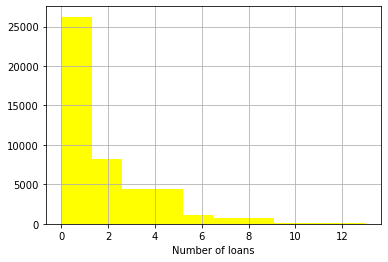

In [47]:
#histogram
df["Number of loans taken by user in last 30 days"].hist(color='yellow')
plt.xlabel('Number of loans')


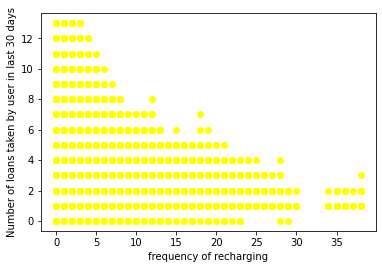

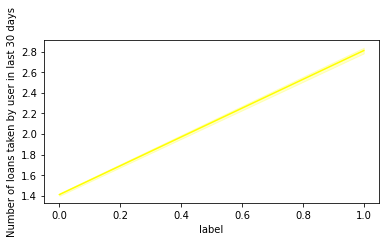

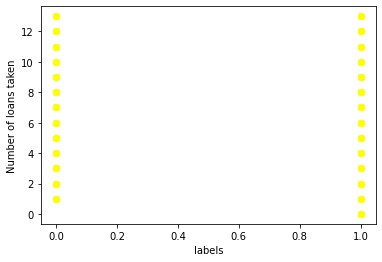

In [48]:

#Frequency of main in last 30
x=df['Frequency of main account recharged in last 30 days']
y=df['Number of loans taken by user in last 30 days']
z=df["label"]
#scatter plot
plt.scatter(x,y,color='yellow')
plt.xlabel('frequency of recharging')
plt.ylabel('Number of loans taken by user in last 30 days')
plt.show()

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Number of loans taken by user in last 30 days",data=df, color='yellow')
plt.show()

#scatter plot
plt.scatter(z,y,color='yellow')
plt.xlabel('labels')
plt.ylabel('Number of loans taken')
plt.show()

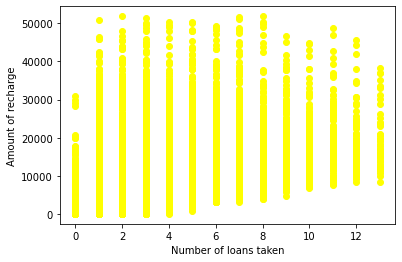

In [49]:
#scatter plot
x=df['Number of loans taken by user in last 30 days']
plt.scatter(x,df["Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)"],color='yellow')
plt.xlabel('Number of loans taken')
plt.ylabel('Amount of recharge')
plt.show()

# b.Total amount of loans taken by user in last 30 days

Text(0, 0.5, 'Number of customers')

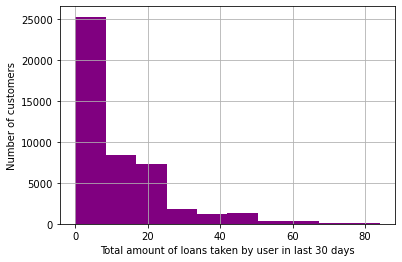

In [50]:
#histogram
df["Total amount of loans taken by user in last 30 days"].hist(color='purple')
plt.xlabel('Total amount of loans taken by user in last 30 days')
plt.ylabel('Number of customers')

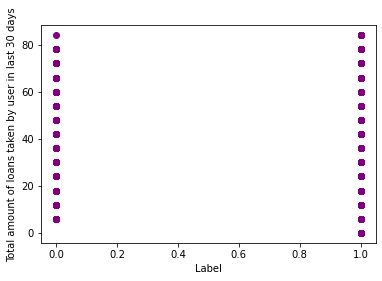

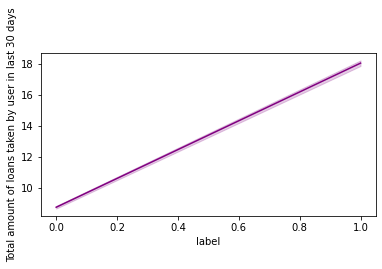

In [51]:

#Frequency of main in last 30
x=df['Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)']
y=df['Total amount of loans taken by user in last 30 days']
z=df["label"]

#scatter plot
plt.scatter(z,y,color='purple')
plt.xlabel('Label')
plt.ylabel('Total amount of loans taken by user in last 30 days')
plt.show()

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Total amount of loans taken by user in last 30 days",data=df, color='purple')
plt.show()

# c.maximum amount of loan taken by the user in last 30 days

There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

Text(0, 0.5, 'number of customers')

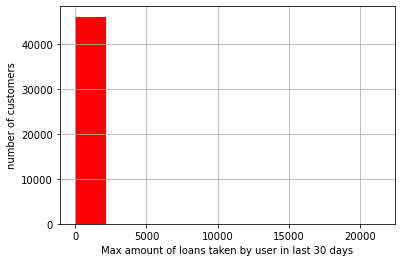

In [52]:
#histogram
df["maximum amount of loan taken by the user in last 30 days"].hist(color='red')
plt.xlabel('Max amount of loans taken by user in last 30 days')
plt.ylabel('number of customers')

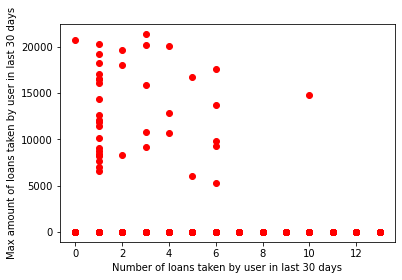

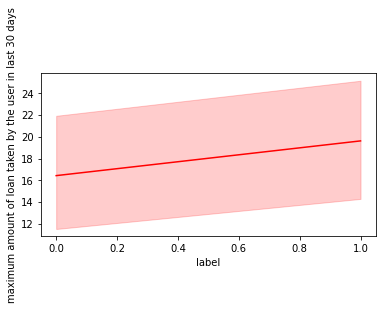

In [53]:

#Frequency of main in last 30
x=df['Number of loans taken by user in last 30 days']
y=df['maximum amount of loan taken by the user in last 30 days']

#scatter plot
plt.scatter(x,y,color='red')
plt.xlabel('Number of loans taken by user in last 30 days')
plt.ylabel('Max amount of loans taken by user in last 30 days')
plt.show()

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="maximum amount of loan taken by the user in last 30 days",data=df, color='red')
plt.show()

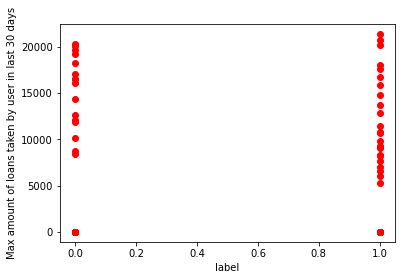

In [54]:
#Frequency of main in last 30
x=df['label']
y=df['maximum amount of loan taken by the user in last 30 days']

#scatter plot
plt.scatter(x,y,color='red')
plt.xlabel('label')
plt.ylabel('Max amount of loans taken by user in last 30 days')
plt.show()


# d.Median of amounts of loan taken by the user in last 30 days

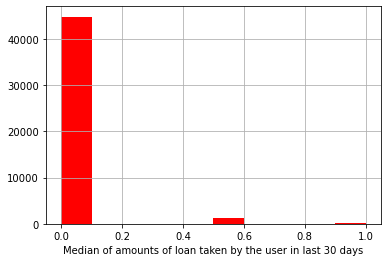

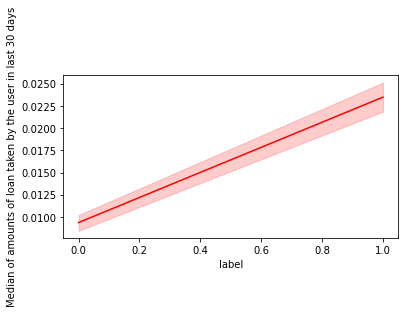

In [55]:
#histogram
df["Median of amounts of loan taken by the user in last 30 days"].hist(color='red')
plt.xlabel('Median of amounts of loan taken by the user in last 30 days')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Median of amounts of loan taken by the user in last 30 days",data=df, color='red')
plt.show()

# 3.Last 30 days recharge in data account

# a.Number of times data account got recharged in last 30 days

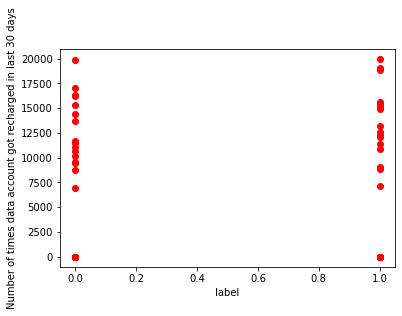

In [56]:
x=df['label']
y=df['Number of times data account got recharged in last 30 days']

#scatter plot
plt.scatter(x,y,color='red')
plt.xlabel('label')
plt.ylabel('Number of times data account got recharged in last 30 days')
plt.show()


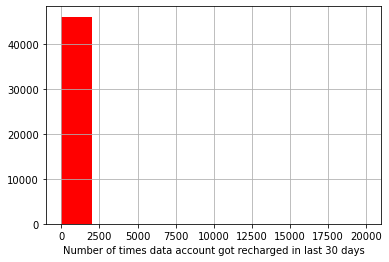

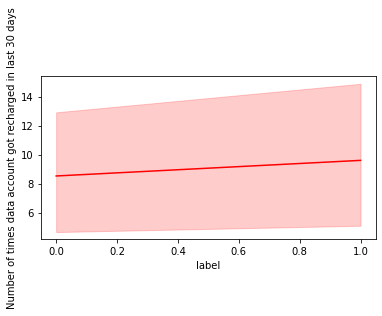

In [57]:
#histogram
df["Number of times data account got recharged in last 30 days"].hist(color='red')
plt.xlabel("Number of times data account got recharged in last 30 days")

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Number of times data account got recharged in last 30 days",data=df, color='red')
plt.show()

# b.Frequency of data account recharged in last 30 days

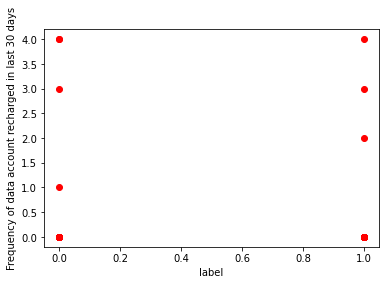

In [58]:
x=df['label']
y=df['Frequency of data account recharged in last 30 days']

#scatter plot
plt.scatter(x,y,color='red')
plt.xlabel('label')
plt.ylabel('Frequency of data account recharged in last 30 days')
plt.show()


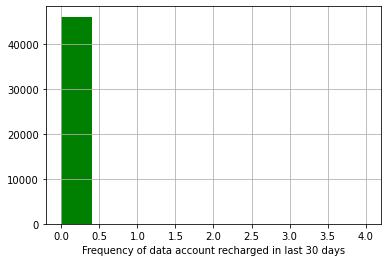

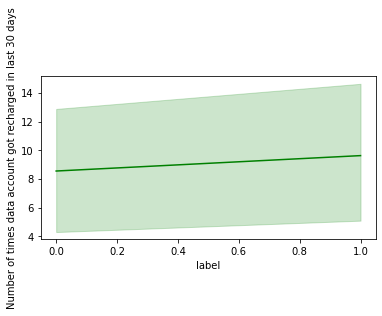

In [59]:
#histogram
df["Frequency of data account recharged in last 30 days"].hist(color='green')
plt.xlabel("Frequency of data account recharged in last 30 days")

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Number of times data account got recharged in last 30 days",data=df, color='green')
plt.show()

# 4.Mean payback time in days over last 30 days

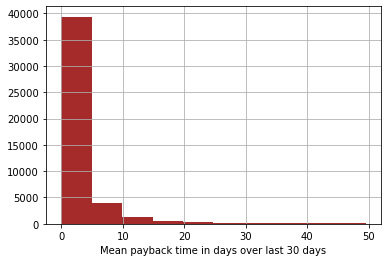

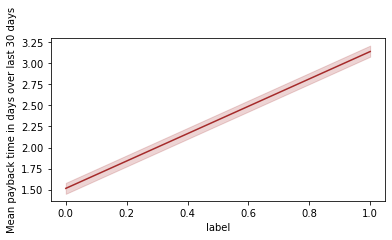

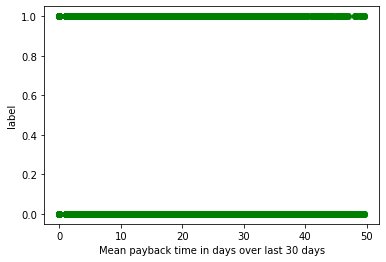

In [60]:
#histogram
df["Mean payback time in days over last 30 days"].hist(color='brown')
plt.xlabel("Mean payback time in days over last 30 days")

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Mean payback time in days over last 30 days",data=df, color='brown')
plt.show()

x=df["Mean payback time in days over last 30 days"]
y=df['label']

#scatter plot
plt.scatter(x,y,color='green')
plt.xlabel("Mean payback time in days over last 30 days")
plt.ylabel('label')
plt.show()

# 90 Days

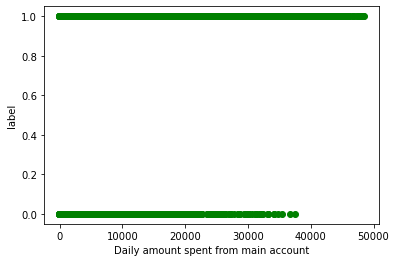

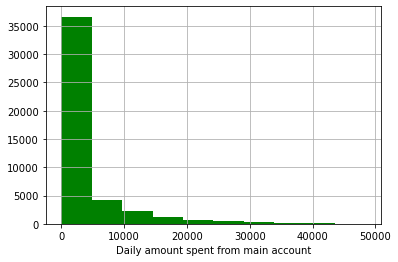

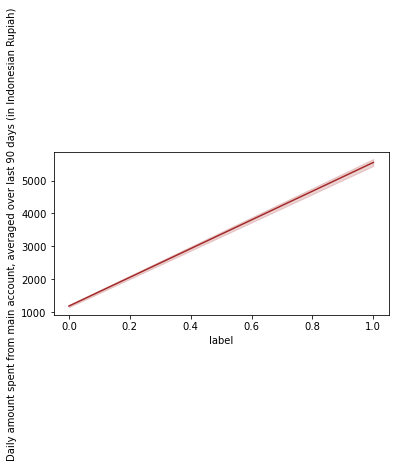

In [61]:
x=df["Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)"]
y=df['label']

#scatter plot
plt.scatter(x,y,color='green')
plt.xlabel("Daily amount spent from main account")
plt.ylabel('label')
plt.show()

x.hist(color='green')
plt.xlabel('Daily amount spent from main account')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)",data=df, color='brown')
plt.show()



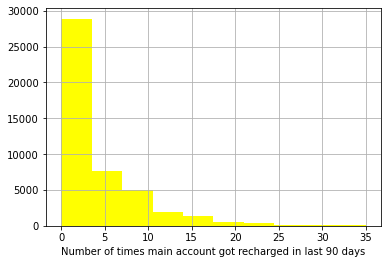

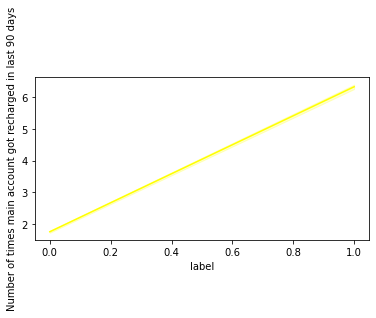

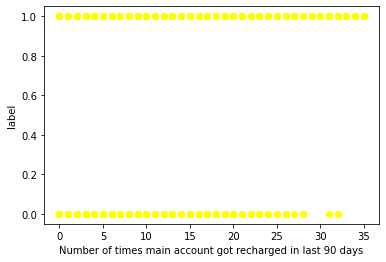

In [62]:
x=df["Number of times main account got recharged in last 90 days"]
y=df['label']

#histogram
df["Number of times main account got recharged in last 90 days"].hist(color='yellow')
plt.xlabel('Number of times main account got recharged in last 90 days')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Number of times main account got recharged in last 90 days",data=df, color='yellow')
plt.show()

#scatter plot
plt.scatter(x,y,color='yellow')
plt.xlabel('Number of times main account got recharged in last 90 days')
plt.ylabel('label')
plt.show()

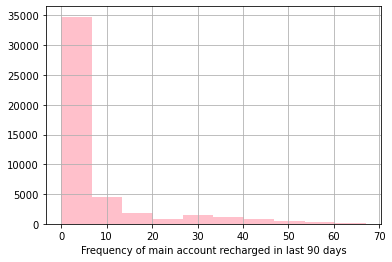

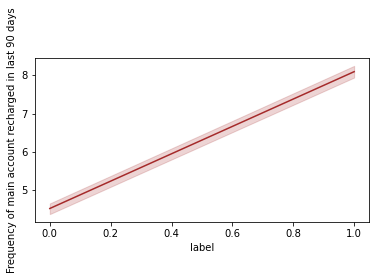

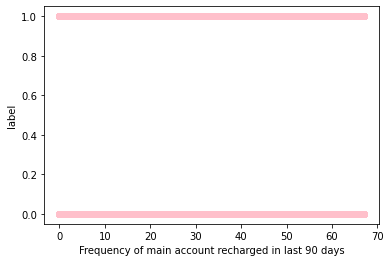

In [63]:
x=df["Frequency of main account recharged in last 90 days"]
y=df['label']

#histogram
df["Frequency of main account recharged in last 90 days"].hist(color='pink')
plt.xlabel('Frequency of main account recharged in last 90 days')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Frequency of main account recharged in last 90 days",data=df, color='brown')
plt.show()

#scatter plot
plt.scatter(x,y,color='pink')
plt.xlabel('Frequency of main account recharged in last 90 days')
plt.ylabel('label')
plt.show()

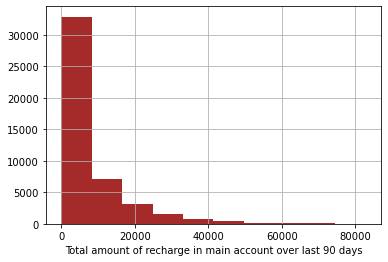

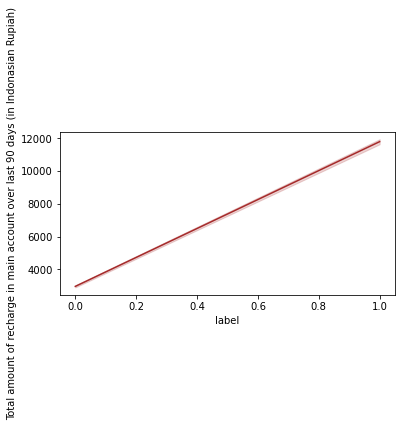

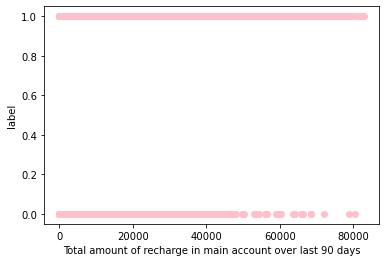

In [64]:
x=df["Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)"]
y=df['label']

#histogram
df["Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)"].hist(color='brown')
plt.xlabel('Total amount of recharge in main account over last 90 days')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)",data=df, color='brown')
plt.show()

#scatter plot
plt.scatter(x,y,color='pink')
plt.xlabel('Total amount of recharge in main account over last 90 days')
plt.ylabel('label')
plt.show()





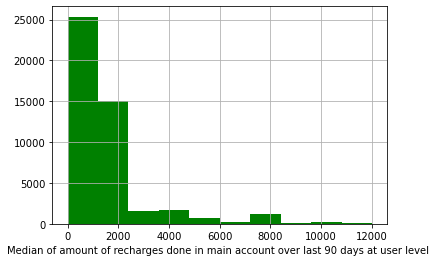

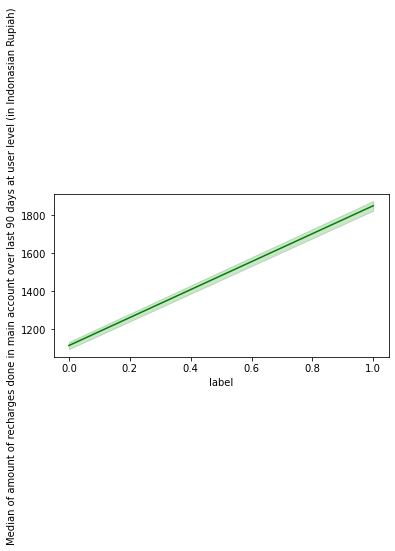

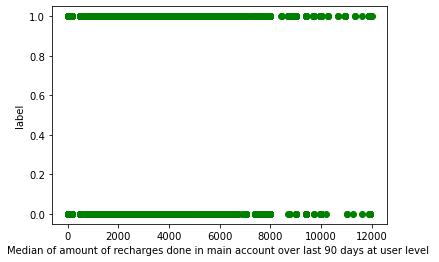

In [65]:
#histogram
df["Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)"].hist(color='green')
plt.xlabel("Median of amount of recharges done in main account over last 90 days at user level ")

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)",data=df, color='green')
plt.show()

x=df["Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)"]
y=df['label']

#scatter plot
plt.scatter(x,y,color='green')
plt.xlabel("Median of amount of recharges done in main account over last 90 days at user level ")
plt.ylabel('label')
plt.show()

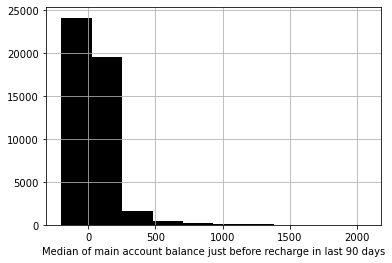

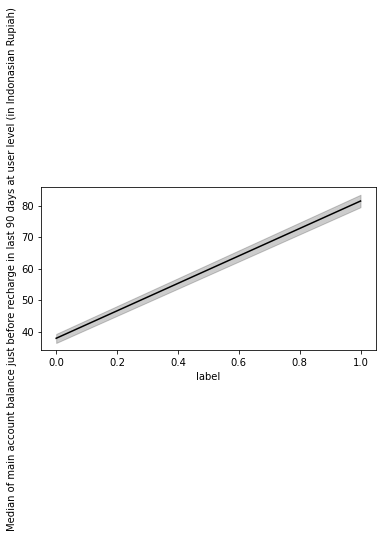

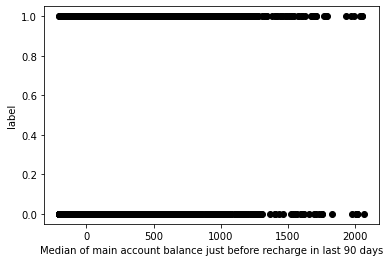

In [66]:
#histogram
df["Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)"].hist(color='black')
plt.xlabel("Median of main account balance just before recharge in last 90 days")

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)",data=df, color='black')
plt.show()

x=df["Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)"]
y=df['label']

#scatter plot
plt.scatter(x,y,color='black')
plt.xlabel("Median of main account balance just before recharge in last 90 days")
plt.ylabel('label')
plt.show()

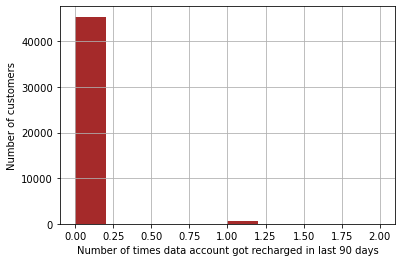

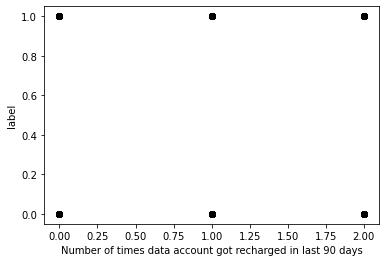

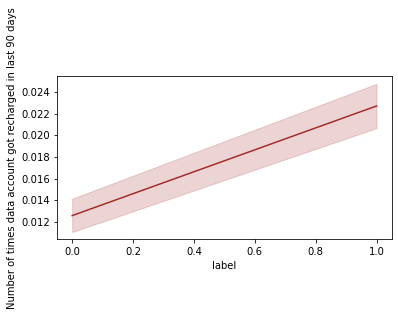

In [67]:
#histogram
df["Number of times data account got recharged in last 90 days"].hist(color='brown')
plt.xlabel("Number of times data account got recharged in last 90 days")
plt.ylabel('Number of customers')
plt.show()




x=df["Number of times data account got recharged in last 90 days"]
y=df['label']
#scatter plot
plt.scatter(x,y,color='black')
plt.xlabel("Number of times data account got recharged in last 90 days")
plt.ylabel('label')
plt.show()


#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Number of times data account got recharged in last 90 days",data=df, color='brown')
plt.show()

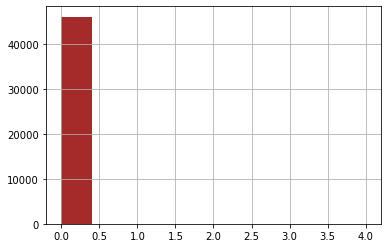

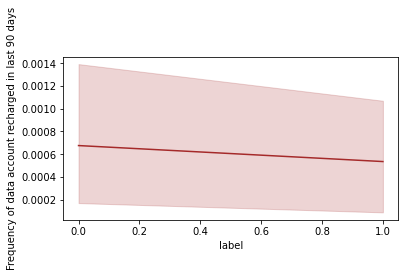

In [68]:
#histogram
df["Frequency of data account recharged in last 90 days"].hist(color='brown')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Frequency of data account recharged in last 90 days",data=df, color='brown')
plt.show()

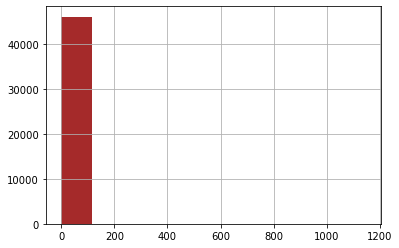

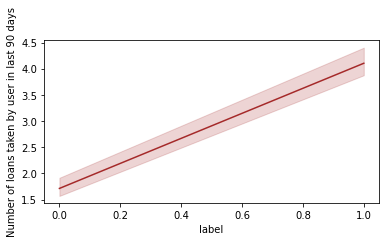

In [69]:
#histogram
df["Number of loans taken by user in last 90 days"].hist(color='brown')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Number of loans taken by user in last 90 days",data=df, color='brown')
plt.show()

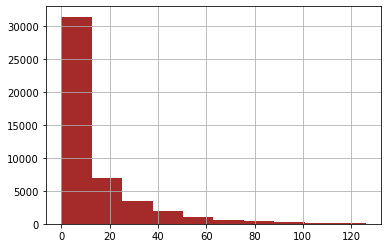

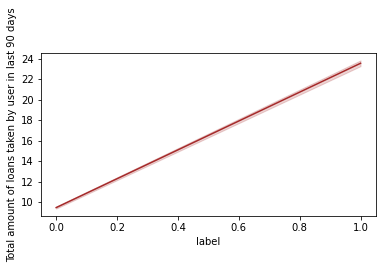

In [70]:
#histogram
df["Total amount of loans taken by user in last 90 days"].hist(color='brown')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Total amount of loans taken by user in last 90 days",data=df, color='brown')
plt.show()

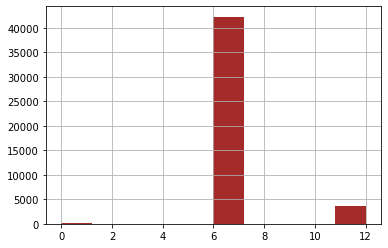

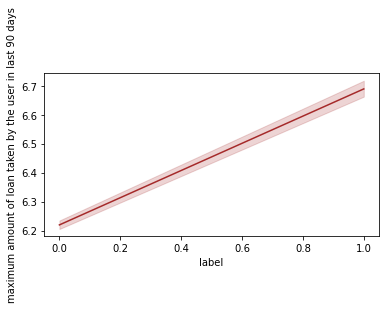

In [71]:
#histogram
df["maximum amount of loan taken by the user in last 90 days"].hist(color='brown')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="maximum amount of loan taken by the user in last 90 days",data=df, color='brown')
plt.show()

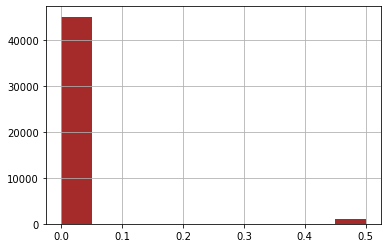

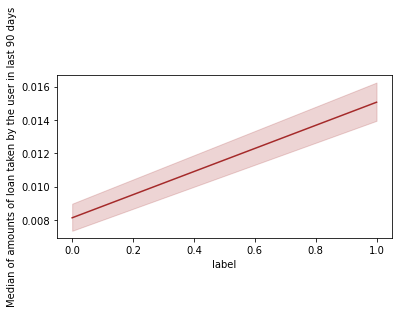

In [72]:
#histogram
df["Median of amounts of loan taken by the user in last 90 days"].hist(color='brown')

#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Median of amounts of loan taken by the user in last 90 days",data=df, color='brown')
plt.show()

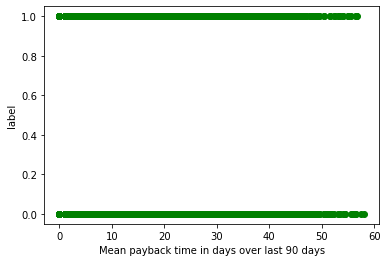

In [73]:
x=df["Mean payback time in days over last 90 days"]
y=df['label']

#scatter plot
plt.scatter(x,y,color='green')
plt.xlabel('Mean payback time in days over last 90 days')
plt.ylabel('label')
plt.show()

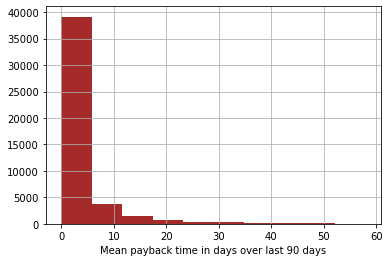

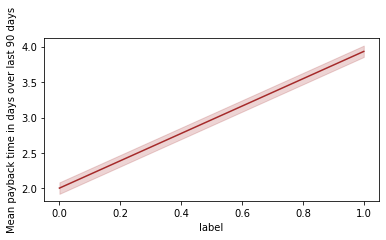

In [74]:
#histogram
df["Mean payback time in days over last 90 days"].hist(color='brown')
plt.xlabel('Mean payback time in days over last 90 days')



#lineplote
plt.figure(figsize=(6,3))
sns.lineplot(x="label",y="Mean payback time in days over last 90 days",data=df, color='brown')
plt.show()

# FEATURE SELECTION

<AxesSubplot:>

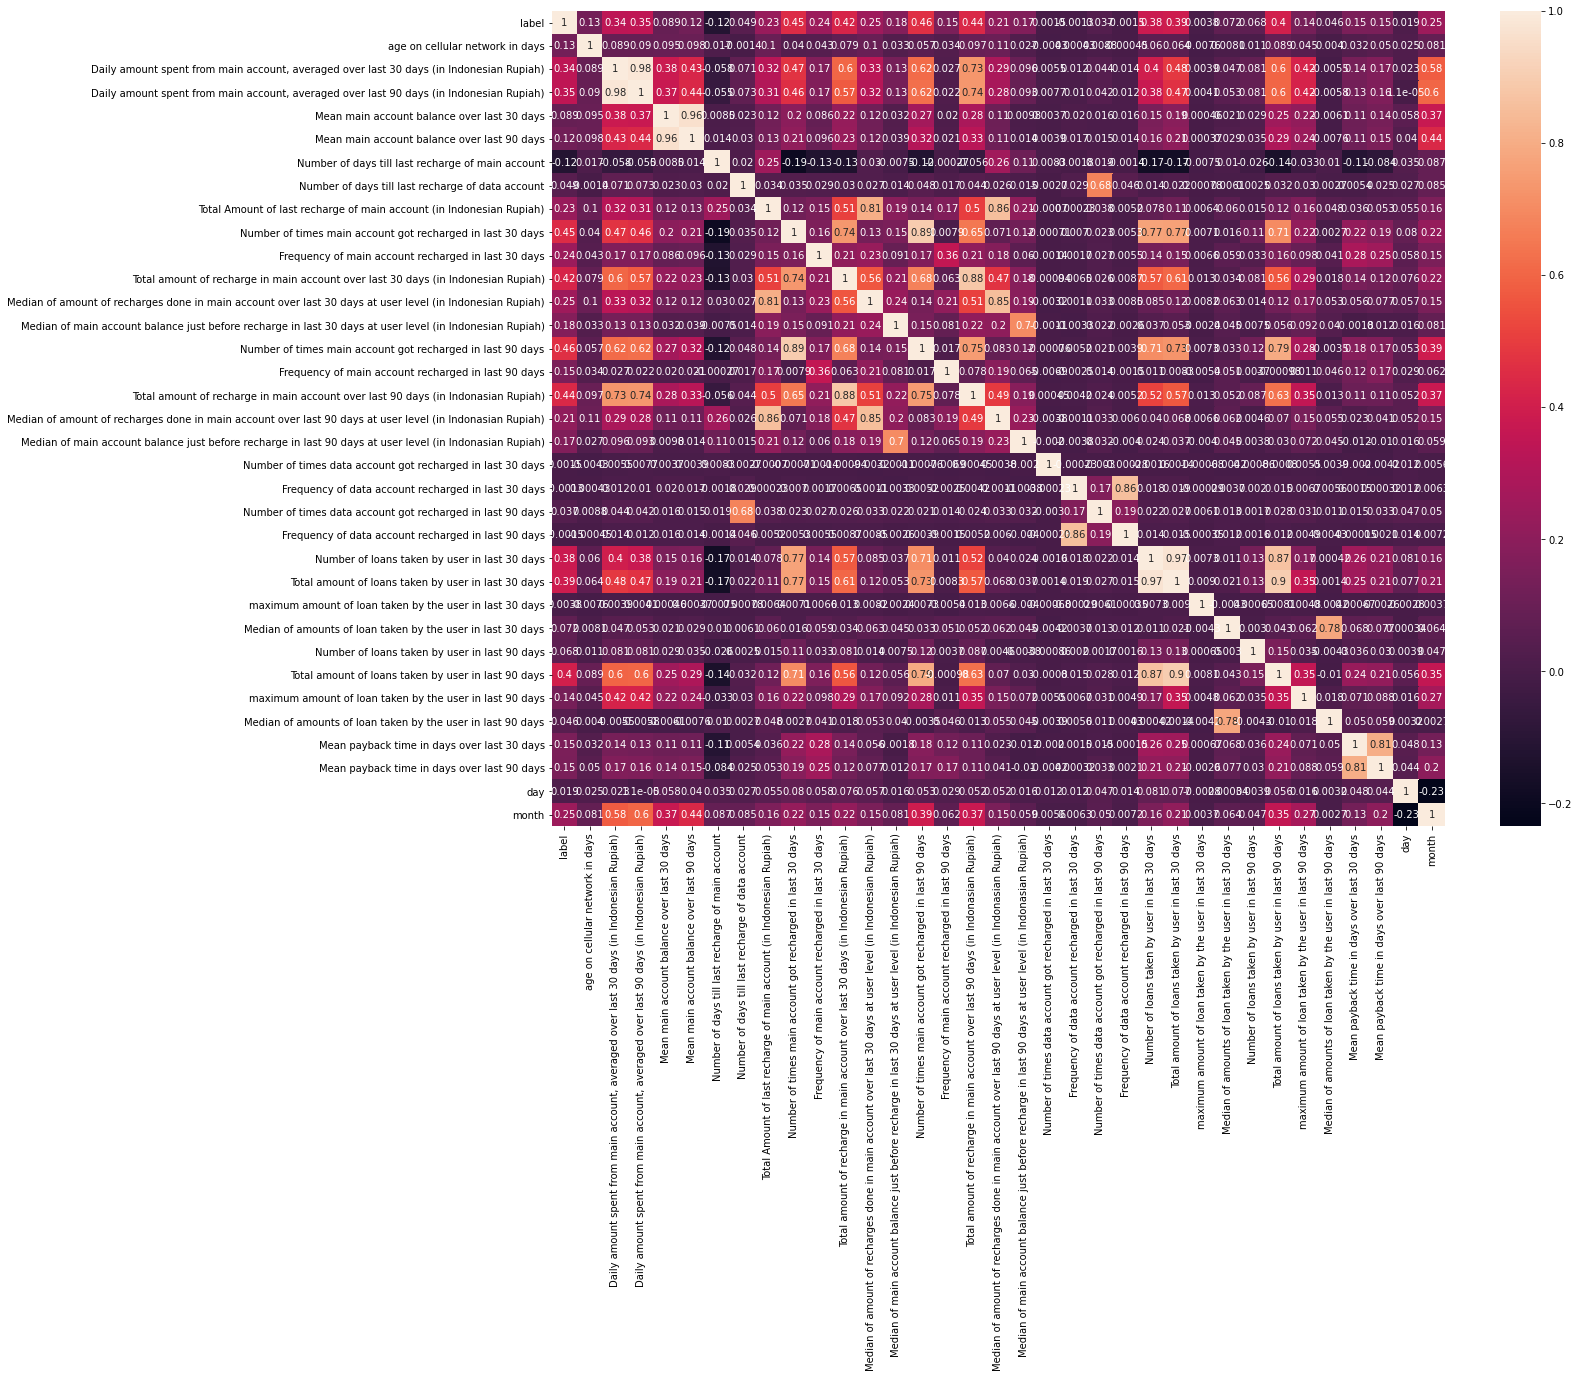

In [75]:
from matplotlib.pyplot import subplot

data_corr=df.corr()
plt.figure(figsize=(20,15))
ax=subplot(111)
sns.heatmap(data_corr,ax=ax,annot=True)

In [76]:
# VIF

x=df.drop(["label"],axis=1)
y=df["label"]

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=x.columns
vif

,quality,feature
0,1.028422,age on cellular network in days
1,34.252905,"Daily amount spent from main account, averaged..."
2,37.993537,"Daily amount spent from main account, averaged..."
3,17.269972,Mean main account balance over last 30 days
4,18.762406,Mean main account balance over last 90 days
5,1.471112,Number of days till last recharge of main account
6,1.906271,Number of days till last recharge of data account
7,4.468330,Total Amount of last recharge of main account ...
8,16.647518,Number of times main account got recharged in ...
9,1.313729,Frequency of main account recharged in last 30...


In [77]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["label"].sort_values(ascending=False)

label                                                                                                        1.000000
Number of times main account got recharged in last 90 days                                                   0.464392
Number of times main account got recharged in last 30 days                                                   0.448863
Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)                            0.436221
Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)                            0.423250
Total amount of loans taken by user in last 90 days                                                          0.404500
Total amount of loans taken by user in last 30 days                                                          0.389770
Number of loans taken by user in last 30 days                                                                0.381811
Daily amount spent from main account, averaged over last

# Splitting data

In [78]:
x=df.drop(["label"],axis=1)
y=df["label"]

#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [79]:
y_train.head()

87962     0
62196     1
126659    0
166800    0
141554    1
Name: label, dtype: int64

# Finding best random state

In [80]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.7787211921677353 on Random State 140


In [81]:
 x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=104)

# Modelling

In [82]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7743891873158898
[[4844 1043]
 [1561 4094]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      5887
           1       0.80      0.72      0.76      5655

    accuracy                           0.77     11542
   macro avg       0.78      0.77      0.77     11542
weighted avg       0.78      0.77      0.77     11542



In [83]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.803586900017328
[[4763 1124]
 [1143 4512]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5887
           1       0.80      0.80      0.80      5655

    accuracy                           0.80     11542
   macro avg       0.80      0.80      0.80     11542
weighted avg       0.80      0.80      0.80     11542



In [84]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8564373592098423
[[5025  862]
 [ 795 4860]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5887
           1       0.85      0.86      0.85      5655

    accuracy                           0.86     11542
   macro avg       0.86      0.86      0.86     11542
weighted avg       0.86      0.86      0.86     11542



In [85]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8148501126321261
[[5010  877]
 [1260 4395]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      5887
           1       0.83      0.78      0.80      5655

    accuracy                           0.81     11542
   macro avg       0.82      0.81      0.81     11542
weighted avg       0.82      0.81      0.81     11542



In [86]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7519549442218131
Cross validation score of Decision Tree model : 0.8012780244774179
Cross validation score of Random Forest model : 0.8526806021878046
Cross validation score of SVC model : 0.7640636846095525


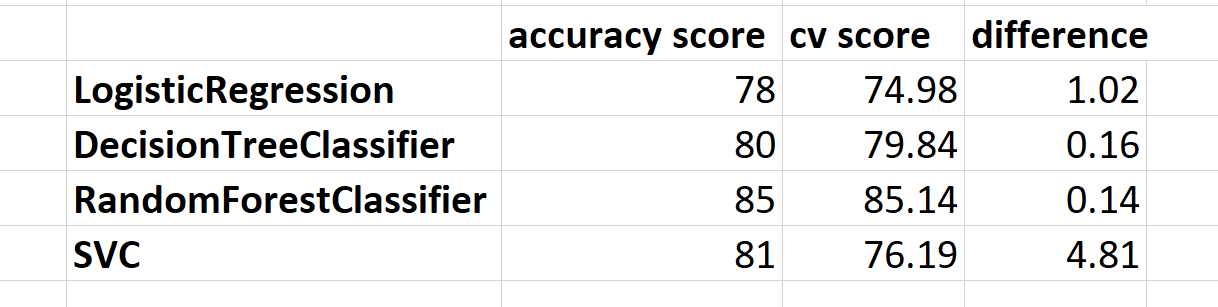

The least difference is for randomforest classifier, hence we would be using it for modelling

# ROC AUC curve

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [88]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [89]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [90]:
print("Logistic regression score is: ",lr.score(x_test,y_test))
print("Decision tree score is ",dt.score(x_test,y_test))
print("Random forest score is",rf.score(x_test,y_test))
print("K-neighbour score is",kn.score(x_test,y_test))

Logistic regression score is:  0.7743891873158898
Decision tree score is  0.8021140183677006
Random forest score is 0.8559175186276209
K-neighbour score is 0.7892046439092012


In [91]:
#RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

0.8559690408679708

In [92]:
#LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.773395530351535

In [93]:
#KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7884417207841703

In [94]:
#DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

0.8020061587243514

In [95]:
# predict probabilities
pred_prob1 = lr.predict_proba(x_test)
pred_prob2 = rf.predict_proba(x_test)
pred_prob3 = kn.predict_proba(x_test)
pred_prob4 = dt.predict_proba(x_test)

In [96]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

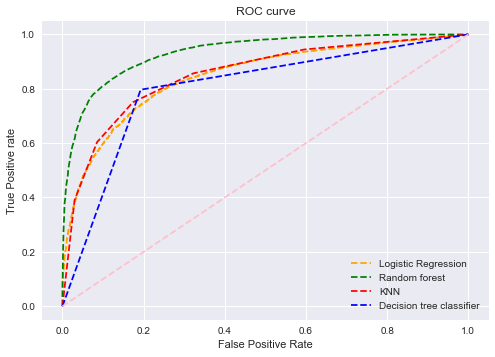

In [97]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Decision tree classifier')

plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Random forest classifier is having highest ROC AUC score and largest area under curve

# Hyperparameter tuning

In [98]:
#HyperParameter tuning
from sklearn.model_selection import GridSearchCV 
paramters={'n_estimators':[2,3,4,5],
           'criterion':['gini','entropy'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

GCV=GridSearchCV(RandomForestClassifier(),paramters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]})

In [99]:
GCV.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 4}

In [100]:
mod=RandomForestClassifier(criterion='gini',max_leaf_nodes=10,min_samples_leaf=2,min_samples_split=4,n_estimators=5)

In [101]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

79.44030497314158


In [102]:
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

# Saving of model

In [103]:
filename='finalized_model.pickle'
pickle.dump(classifier,open(filename,'wb'))

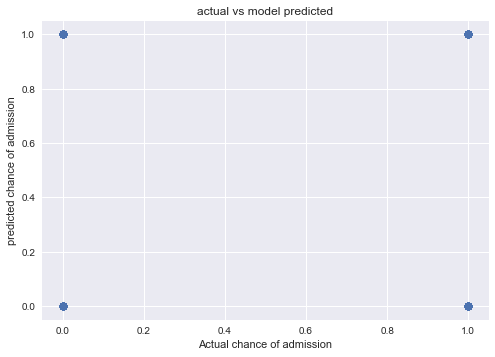

In [104]:
#Adjusted accuracy
classifier.score(x_train,y_train)
y_pred=classifier.predict(x_test)
plt.scatter(y_test,y_pred)

plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5887
           1       0.85      0.86      0.85      5655

    accuracy                           0.85     11542
   macro avg       0.85      0.85      0.85     11542
weighted avg       0.85      0.85      0.85     11542



In [106]:
scr=cross_val_score(classifier,x,y,cv=5)
print("Cross validation score of Random forest model :", scr.mean())

Cross validation score of Random forest model : 0.8537853352106575


In [107]:
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
print("accuracy score of the Random Forest model is",accuracy_score(y_test,pred)*100)

accuracy score of the Random Forest model is 85.69571997920637


In [108]:
classifier.fit(x_train,y_train)
print("ROC AUC Score of the Random forest model is",roc_auc_score(y_test,classifier.predict(x_test)))

ROC AUC Score of the Random forest model is 0.8551406183986445


In [109]:
print(confusion_matrix(y_test, y_pred))

[[5019  868]
 [ 807 4848]]


In [112]:
print("precision is ", 5019/(5019+868))

precision is  0.8525564803804994


In [113]:
print("recall is ", 5019/(5019+807))

recall is  0.8614830072090628
